In [30]:
import copy,csv,time,nltk,emoji,gensim,string
import pandas as pd
import numpy as np
from tabulate import tabulate
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim.models import word2vec
import gensim.models.keyedvectors as word2vec #need to use due to depreceated model
from keras.models import Sequential
from keras.preprocessing import sequence
from keras import models,layers
from keras.layers import Dense,Dropout,LSTM,Activation,Bidirectional,Flatten,Embedding,Conv1D,MaxPooling1D
from keras.optimizers import SGD
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer,one_hot,text_to_word_sequence
from keras.initializers import Constant 
from keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,cohen_kappa_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score 
from keras.utils.np_utils import to_categorical
from sklearn.datasets import make_circles
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.embeddings import Embedding
from tensorflow import set_random_seed
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from nltk import bigrams, trigrams
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
#using LSTM  works fine
import warnings
import sys
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")  #Ignoring unnecessory warnings
df=pd.read_csv('commentP_consN.csv',delimiter=';',names=['comment'],encoding="utf8")
all=pd.DataFrame(df) #changing to data frame 
print(all)
print(all.info())

                                                comment
0                                     1 በጣም አሪፍ ስራ ነው  
1                     2 በወሎኛ ዜማ አሽርልኝ እኔማ ሳላፈቅርህ አልቀረሁም
2                                   3 ጎበዝ እንባዬ አልቆም አለኝ
3     4 እሱን በመናፈቅ ጠንቷል ጸሎታቸው ስለታቸው ሰምሮ ይመጣል ጌታቸው ያበደ...
4     5 ሰላም ፍቅር ፍትህ ለምዪ ኢትዮጵያ ይሁን ኡፍፍ ደሞ ደስ ብሎኛል 3ቀን...
5                                6 እባክዎ ላይክ ይጫኑ ከይቃርታ ጋ
6                               7 እጅግ በጣም ደስ የሚል፣ ስራ ነው
7     8 ሲዘፍን በራሱ ላብ ጠብ እያለ ነው አይሰሙትም እጂ እነ እንትና ቢሰሙት...
8                   9 አቦ ተባረክ የእውነት የሀገር ፍቅር ያለው ሰው ነህ 
9                                       10 እንዴ አዲስ መሰለኝ
10    11 ስለመደመር እንደዚህ ልጅ ሙዚቃው የደመቀለት የተወደደለት የለም አሁን...
11            12 ኢትዮጵያዬ ቀና ምትይበት ቀን የደረሰ ይመስላል ተስፋ አለኝ 
12    13 እንደው ስወድህ አስተዋይ ዘመንህ ብሩህ ይሁን እምዪ ሀገራችንም ሰላሟ...
13                   14 የቅኔ አባት ቢሉህ አያንስብህም ቅኔህ ቤት ይመታል
14                       15 ይሄ ልጅ ብቻ  የእውነት ለሀገሩ የሚዘፍነው
15    16 ይኽ ልጅ ይዋጣለታል አቦ እደሱ ንገርልኝ ደማቸውን አፍሰው አጥታቸውን...
16                                          17 በ

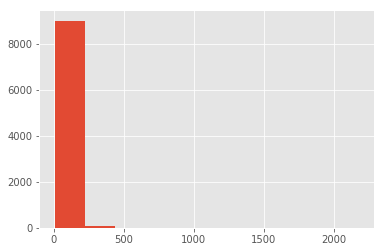

None
count    9138.000000
mean       43.936638
std        65.004874
min         5.000000
25%        18.000000
50%        30.000000
75%        51.000000
max      2179.000000
dtype: float64
0                                       1 በጣም አሪፍ ስራ ነው  
1                       2 በወሎኛ ዜማ አሽርልኝ እኔማ ሳላፈቅርህ አልቀረሁም
2                                     3 ጎበዝ እንባዬ አልቆም አለኝ
3       4 እሱን በመናፈቅ ጠንቷል ጸሎታቸው ስለታቸው ሰምሮ ይመጣል ጌታቸው ያበደ...
4       5 ሰላም ፍቅር ፍትህ ለምዪ ኢትዮጵያ ይሁን ኡፍፍ ደሞ ደስ ብሎኛል 3ቀን...
5                                  6 እባክዎ ላይክ ይጫኑ ከይቃርታ ጋ
6                                 7 እጅግ በጣም ደስ የሚል፣ ስራ ነው
7       8 ሲዘፍን በራሱ ላብ ጠብ እያለ ነው አይሰሙትም እጂ እነ እንትና ቢሰሙት...
8                     9 አቦ ተባረክ የእውነት የሀገር ፍቅር ያለው ሰው ነህ 
9                                         10 እንዴ አዲስ መሰለኝ
10      11 ስለመደመር እንደዚህ ልጅ ሙዚቃው የደመቀለት የተወደደለት የለም አሁን...
11              12 ኢትዮጵያዬ ቀና ምትይበት ቀን የደረሰ ይመስላል ተስፋ አለኝ 
12      13 እንደው ስወድህ አስተዋይ ዘመንህ ብሩህ ይሁን እምዪ ሀገራችንም ሰላሟ...
13                     14 የቅኔ አባት ቢሉህ አያንስብህም ቅኔህ ቤት ይመታል


In [31]:
#describition before preprocessing 
reviews_len = [len(x) for x in df['comment']]
pd.Series(reviews_len).hist()
print(plt.show())
print(pd.Series(reviews_len).describe())
#df['tokenized_sents']= df.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)
#df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']),axis=1)
#print(df[['tokenized_sents','sents_length']])
#print("sum of words is",sum(df['sents_length']))
#print("the maximum sents length is",df['sents_length'].max())
#for considering Emojis 
#df['comment'] = [''.join(c for c in s if c not in string.punctuation) for s in df['comment']]
print(df['comment']) 
#removing whitespaces(remove leading and ending spaces)
#df['comment'] = df['comment'].str.strip()
#print("removing white spaces")
#print(df[['comment']].head())
#remove digits 
df['comment'] = df['comment'].str.replace('\d+', '')
#print(df[['comment']])
#the following is normalization of words and characters
df['comment'] = df['comment'].replace(regex={"ዐ":"አ","ዑ":"ኡ","ዒ":"ኢ","ዓ":"አ","ዔ":"ኤ","ዕ":"እ","ዖ":"ኦ",
                                            "ዓ":"አ","ኽ":"ህ","ሃ":"ሀ","ዉ":"ው",
                                            "ጸ":"ፀ","ጹ":"ፁ","ጺ":"ፂ","ጻ":"ፃ","ጼ":"ፄ","ጽ":"ፅ","ጾ":"ፆ",
                                             "ኃ":"ሀ","ኁ":"ሁ","ኂ":"ሂ","ኃ":"ሀ","ኄ":"ሄ","ኅ":"ህ","ኆ":"ሆ",
                                             "ሠ":"ሰ","ሡ":"ሱ","ሢ":"ሲ","ሣ":"ሳ","ሤ":"ሴ","ሥ":"ስ","ሦ":"ሶ",
                                            "ሐ":"ሀ","ሑ":"ሁ","ሒ":"ሂ","ሓ":"ሀ","ሔ":"ሄ","ሕ":"ህ","ሖ":"ሆ",                                             
                                             "ኮመንት":"አስተያየት","ሙቭ":"ፊልም","ኢትዮጽያ":"ኢትዮጵያ","ኢትዬ":"ኢትዮጵያ",
                                             "ኢቲዮፒያ":"ኢትዮጵያ","ፍልም":"ፊልም","በጠም":"በጣም","1ኛ":"አንደኛ","ይመችክ":"ይመችህ",
                                             "ይሁንላቹ":"ይሁንላችሁ","አረ":"እረ","ላይክ":"ዉደድ","ፍቅርርር":"ፍቅር","ፍቅርር":"ፍቅር",
                                             "ሀሪፍ":"አሪፍ","ሀሪፈ":"አሪፍ","ሰውደወ":"ስወደው","ዋውውውው":"ዋው","ኡፍፍፍፍፍፍፍ":"ኡፍፍ","ኡፍፍፍፍፍፍ":"ኡፍፍ",
                                             "ኡፍፍፍፍፍ":"ኡፍፍ","ኡፍፍፍ":"ኡፍ","ውድድድድድ":"ውድድ",
                                            "ውድድድድ":"ውድድ","ውድድድ":"ውድድ","1ኛ":"አንደኛ","ኢትዩቢያዊ":"ኢትዮጽያዊ"})
print(df[['comment']])
#removing htmls from each comment
df['comment']=df['comment'].replace('{html}',"")
#removing punctuations and Emojis
df['comment'] = df['comment'].str.replace('[^\w\s]','')
freq = pd.Series(' '.join(df['comment']).split()).value_counts()[-10:] 
for index, row in df.iterrows():
     row=df['comment']==""
     index_no=df.index[row] #display index numbers(rows) that have element(values) 
aa=df['comment'].drop(index_no,axis=0)
aa.to_csv('output.csv', index=False, header=None)
df=pd.read_csv('output.csv',delimiter=';',names=['comment'],encoding="utf-8")
afteremojiR=pd.DataFrame(df) #changing to data frame
print(afteremojiR)

In [32]:
#tokenizing of the comments 
df['tokenized_sents']= df.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)
#print("tokenized sents are")
# removing na values(containing empty values)
df['tokenized_sents'].replace('', np.nan, inplace=True)
#print(tabulate(dft['tokenized_sents']))
frequency=df['tokenized_sents']
#stop = stopwords.words('Amharic')
#df['stopwords'] = df['tokenized_sents'].apply(lambda x: len([item for item in x if item in stop]))
#df['tokenized_sents']=df['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])

In [33]:
df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']),axis=1)
print(df[['tokenized_sents','sents_length']])
print("sum of words is",sum(df['sents_length']))
print("the maximum sents length is",df['sents_length'].sum())
df4=df['tokenized_sents']
#print("df4 is,",df4)
df5=pd.Series.to_frame(df4) #to change series to frame'
df5.columns=['tokenized_sents']
#dfp=pd.read_csv('positive_emoji.csv',delimiter=';',names=['positive_emoji'],encoding="utf8")
#dfn=pd.read_csv('negative_emoji.csv',delimiter=';',names=['negative_emoji'],encoding="utf8")
df2=pd.read_csv('Negative.csv',names=['negative'],encoding="utf8")
df7=pd.read_csv('positive.csv',names=['positive'],encoding="utf8")
df8=pd.read_csv('Invertor.csv',names=['Invertor'],encoding="utf8")
df9=pd.read_csv('intensifierA.csv',names=['intensifier'],encoding="utf8")
columen_names=['negative','positive','Invertor','intensifierA']
result=pd.concat([df2,df7,df8,df9],axis=1,join='outer',sort=False,names=columen_names)
blankIndex=[''] * len(result)
result.index=blankIndex
#print(tabulate(result))
#information about lexicons 
print("number of positive lexicon",df8.info())
print("number of negative lexicon",df9.info())

                                        tokenized_sents  sents_length
0                                    [በጣም, አሪፍ, ስራ, ነው]             4
1                [በወሎኛ, ዜማ, አሽርልኝ, እኔማ, ሳላፈቅርህ, አልቀረሁም]             6
2                                [ጎበዝ, እንባዬ, አልቆም, አለኝ]             4
3     [እሱን, በመናፈቅ, ጠንቷል, ፀሎታቸው, ስለታቸው, ሰምሮ, ይመጣል, ጌታ...            10
4     [ሰላም, ፍቅር, ፍትህ, ለምዪ, ኢትዮጵያ, ይሁን, ኡፍፍ, ደሞ, ደስ, ...            15
5                            [እባክዎ, ዉደድ, ይጫኑ, ከይቃርታ, ጋ]             5
6                           [እጅግ, በጣም, ደስ, የሚል, ስራ, ነው]             6
7     [ሲዘፍን, በራሱ, ላብ, ጠብ, እያለ, ነው, አይሰሙትም, እጂ, እነ, እ...            15
8             [አቦ, ተባረክ, የእውነት, የሀገር, ፍቅር, ያለው, ሰው, ነህ]             8
9                                      [እንዴ, አዲስ, መሰለኝ]             3
10    [ስለመደመር, እንደዚህ, ልጅ, ሙዚቃው, የደመቀለት, የተወደደለት, የለም...             9
11       [ኢትዮጵያዬ, ቀና, ምትይበት, ቀን, የደረሰ, ይመስላል, ተስፋ, አለኝ]             8
12    [እንደው, ስወድህ, አስተዋይ, ዘመንህ, ብሩህ, ይሁን, እምዪ, ሀገራችን...            15
13              [የቅኔ

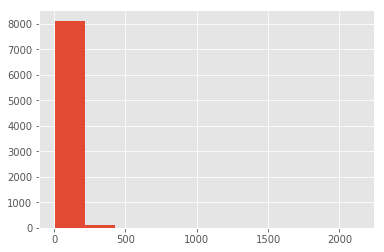

None
count    8237.000000
mean       41.810004
std        66.558628
min         3.000000
25%        15.000000
50%        28.000000
75%        48.000000
max      2137.000000
dtype: float64


In [34]:
positive_count=0
negative_count=0
invertor_count=0
intensifier_count=0
pos_emoji=0
positive_emoji_count=0
negative_emoji_count=0
emoji_score=0
#review length analysis used to include or exclude very short or lengthy statements
reviews_len = [len(x) for x in df['comment']]
pd.Series(reviews_len).hist()
print(plt.show())
print(pd.Series(reviews_len).describe())
df10 = pd.DataFrame(columns=['polarity'])
def extract_emoji(str):
            return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)
positive_emoji=['😂','❤','♥','😍','😘','😊','👌','💕','👏','😁','☺','♡','👍','🙏','✌','😏',
                '😉','🙌','🙈','√', '❤️','♥️','♥️','❤️',
'💪','😄','😃','😱','🎉','😜','🌸','💜','💙','😳','💗','☀','😎','😢','💋','😋','🙊','🎶','💞','💝'
'😌','💯','💛','💁','💚','😆','😝','😅','👊','😀','😚','😻','💘','👋','✋','🎊','❄','😥','😈',
'🔝','😰','⚽','👑','😹','🍃','🎁','🐧','🎈','✊','💤','💓','💦','🙋','🎄','🎵','😛','😬','👯',
'💎','🎂','👫','🏆','☝','😙','⛄','👅','♪','🍂','💏','🌴','👈','🌹','🙆','💰','🍻''🌞','🍁','⭐',
'🎀','🙉','💅','🌺','🐶','🌚','🎤','👭','🎧','👆','🍸','😇','🍉','🎸','🍹','💫','📚','🌷','💝',
'💨','🏈','💍','☔','👸','🇪','😸','🍔','👼','🐯','😵','👶','💐','↾','📖','🐒','🌍','┊','🐥','💄',
'💸','⛔','🏀','💉','💟','😯','♦','🌙','🐟','👣','🗿','🍝','🍭','❌','🐰','💊','🚨','🍪','✧','🎆',
'🎎','🇩','✅','🔊','👠','🌌','🍎','🐻','💇','🍊','🍒','🐭','👟','🌎','🍍','🐮','📲','🌅','🇷','🌽',
'🍬','😺','🚀','¦🍧','🍜','🆗','🍋','➤','🏄','👧','🐏','✏','🌾','🏡','👙','⛅','🍅','📺','🐍','🇮',
'♣🇹','🐬','🌳','💿','🔐','🐨','🌕','🔵','🍳','🚴','👰','⚓','👗','➕','💬','🔜','🍨','🍙','🍗','🍲',
'😼','🐙','👨','🍚','🍖','♨▃','🚘']
negative_emoji=['😭',' 😩','😒','💖','😔','😡','😴','🔫','😞','😪',' 😫','💀','😕',
'💔','😤','😑','😠','😓','😣','😲','😿','😐' '😨','😷','👎','💩','🙅','😶','🔪','💃',
                '👿','✂','👪','😦','🍣','🙍','💧','😾','🍥','😭']  

In [35]:
for (index_label, row_series) in df5.iterrows():
    #print('Row Index label : ', index_label)
    #print('Row Content as Series : ', row_series.values)
    #Series.array(row_series.values())
    list=row_series.values  #accessing the row values
    for i in range(len(list)):
         #print(list[i])
        ll=len(list[i])
        #print(ll)
        li=list[i]
        print(li)              #if df2['negative'].isin(li[j]) 
        xx=extract_emoji(li)
        #print(xx)    
        y=[]
        for s in xx:
            y.append(s)
            ''.join(y)
        #print(y)
        pos_emojiexist=[]
        neg_emojiexist=[]
        for element in positive_emoji:
            for word in y:
                pos_emojiexist.append(word in element)
                positive_emoji_count=sum(pos_emojiexist)
        for item in negative_emoji:
            for word in y:
                neg_emojiexist.append(word in item)
                negative_emoji_count=sum(neg_emojiexist)
        if len(y)!=0:
            emoji_score=positive_emoji_count-negative_emoji_count
        else:
            emoji_score=0
        positive_res=result.positive.isin(li)
        negative_res=result.negative.isin(li)
        invertor_res=result.Invertor.isin(li)
        intensifierA_res=result.intensifier.isin(li)
        positive_count=sum(positive_res)*2
        negative_count=sum(negative_res)*2
        invertor_count=sum(invertor_res)
        intensifier_count=sum(intensifierA_res)
        sentiment_score=positive_count-negative_count
        if invertor_count>0 and intensifier_count==0 and sentiment_score>0 and  ll>0:
            sentiment=-(sentiment_score)
        if invertor_count>0 and intensifier_count==0 and sentiment_score<0  and ll>0:
            sentiment=-(sentiment_score)
        if intensifier_count>0 and invertor_count==0 and sentiment_score>0  and ll>0:
            sentiment=sentiment_score+3
        if intensifier_count> 0 and invertor_count==0 and sentiment_score <0 and ll>0:
            sentiment=sentiment_score-3
        if invertor_count==0 and intensifier_count==0 and sentiment_score >0 and ll>0:
            sentiment=sentiment_score
        if invertor_count==0 and intensifier_count==0 and sentiment_score <0 and   ll>0:
            sentiment=sentiment_score
        if intensifier_count> 0 and invertor_count> 0 and sentiment_score>0  and ll>0:
            sentiment=-(sentiment_score)+3
        if intensifier_count> 0 and invertor_count> 0 and sentiment_score<0 and ll>0:
            sentiment=-(sentiment_score)-3
        if intensifier_count> 0 and invertor_count==0 and sentiment_score==0 and ll>0:
             sentiment=sentiment_score
        if sentiment_score==0 and invertor_count==0 and intensifier_count==0 and ll>0:
             sentiment=sentiment_score
        if sentiment>0 and emoji_score>=0:
            print("positive")
            df10 = df10.append({'polarity': "positive"}, ignore_index=True)
        if sentiment==0 and emoji_score>0:
            print("positive")
            df10 = df10.append({'polarity': "positive"}, ignore_index=True)
        if sentiment<0 and emoji_score<=0:
            print("negative")
            df10 = df10.append({'polarity': "negative"}, ignore_index=True)
        if sentiment==0 and emoji_score<0:
            print("negative")
            df10 = df10.append({'polarity': "negative"}, ignore_index=True)
        if sentiment<0 and emoji_score>0:#no change word first
            print("negative")
            df10 = df10.append({'polarity': "negative"}, ignore_index=True)
        if sentiment > 0 and emoji_score<0: #word first
            print("positive")
            df10 = df10.append({'polarity': "positive"}, ignore_index=True)
        if sentiment==0 and emoji_score==0:
            print("neutral")
            df10 = df10.append({'polarity': "neutral"}, ignore_index=True)
        if ll==0:
            print("neither")            
#print(df10)
df11=pd.concat([df4,df10],axis=1,join='inner',sort=False)  
#print(df11)  

['በጣም', 'አሪፍ', 'ስራ', 'ነው']
positive
['በወሎኛ', 'ዜማ', 'አሽርልኝ', 'እኔማ', 'ሳላፈቅርህ', 'አልቀረሁም']
positive
['ጎበዝ', 'እንባዬ', 'አልቆም', 'አለኝ']
positive
['እሱን', 'በመናፈቅ', 'ጠንቷል', 'ፀሎታቸው', 'ስለታቸው', 'ሰምሮ', 'ይመጣል', 'ጌታቸው', 'ያበደነው', 'በርታ']
positive
['ሰላም', 'ፍቅር', 'ፍትህ', 'ለምዪ', 'ኢትዮጵያ', 'ይሁን', 'ኡፍፍ', 'ደሞ', 'ደስ', 'ብሎኛል', 'ቀን', 'ቀረኝ', 'ሀገሬ', 'ዱቅ', 'ልል']
positive
['እባክዎ', 'ዉደድ', 'ይጫኑ', 'ከይቃርታ', 'ጋ']
neutral
['እጅግ', 'በጣም', 'ደስ', 'የሚል', 'ስራ', 'ነው']
positive
['ሲዘፍን', 'በራሱ', 'ላብ', 'ጠብ', 'እያለ', 'ነው', 'አይሰሙትም', 'እጂ', 'እነ', 'እንትና', 'ቢሰሙት', 'ምርጥ', 'ቅኔ', 'ነበር', 'የነገረቻቸው']
positive
['አቦ', 'ተባረክ', 'የእውነት', 'የሀገር', 'ፍቅር', 'ያለው', 'ሰው', 'ነህ']
positive
['እንዴ', 'አዲስ', 'መሰለኝ']
positive
['ስለመደመር', 'እንደዚህ', 'ልጅ', 'ሙዚቃው', 'የደመቀለት', 'የተወደደለት', 'የለም', 'አሁንም', 'ደገመው']
positive
['ኢትዮጵያዬ', 'ቀና', 'ምትይበት', 'ቀን', 'የደረሰ', 'ይመስላል', 'ተስፋ', 'አለኝ']
positive
['እንደው', 'ስወድህ', 'አስተዋይ', 'ዘመንህ', 'ብሩህ', 'ይሁን', 'እምዪ', 'ሀገራችንም', 'ሰላሟ', 'ብዝት', 'ይበልልን', 'በስደት', 'ያለነውንም', 'ልጆችሽንም', 'ሰብስቢን']
positive
['የቅኔ', 'አባት', 'ቢሉህ', 'አያንስብህም', 'ቅኔህ', 'ቤት', 'ይመታል']
p

['ዋው', 'በጣም', 'ያምራል', 'ውድድ']
positive
['ያረጀ', 'ፊልም', 'ኤጭ', 'አይናችን', 'የናንተ', 'መቀለጃ', 'ይሁን']
negative
['እና', 'መሳሪያ', 'የሚለው', 'በጣም', 'ተመችቶኛል', 'ክክክ']
positive
['ሁሌ', 'ቢታይ', 'የማይጠገብ', 'ነው', 'የእውነት']
positive
['ይመቻችሁ', 'የኔ', 'ምርጦች', 'ውድድ']
positive
['አሪፍ', 'ፊልም', 'ነው']
positive
['በስንት', 'አመቴ', 'ደግሜ', 'ልየው', 'እስኪ', 'ጥሩ', 'ነገር', 'መቼም', 'አይሰለችም']
positive
['እስካሁን', 'ድረስ', 'እንደ', 'ወንዶች', 'ጉዳይ', 'የሚያስቅ', 'ፊልም', 'አላየሁም', 'ወደፊትም', 'እሚኖር', 'አይመስለኝም']
neutral
['አቦ', 'ይመቻችሁ', 'አራዶች']
positive
['ደስ', 'የሚል', 'የሚያዝናና']
positive
['ክክክ', 'ውይ', 'ስወዳችሁ']
positive
['አይ', 'ሸዋ', 'ፈራሁ', 'እንደው', 'ስወድህ', 'ይመቻችሁ']
positive
['መቼ', 'ነው', 'ቁጥር', 'ሶስት', 'የሚወጣው']
neutral
['ያረጀ', 'ፊልም', 'ኤጭ', 'አይናችን', 'የናንተ', 'መቀለጃ', 'ይሁን']
negative
['ኧረ', 'ልቀቁልን', 'በናታችሁ']
neutral
['እኔ', 'ግን', 'ደስ', 'የሚለኝ', 'ነገር', 'ፊልሙን', 'የምከፍተው', 'ኮሜንት', 'አንብቤ', 'ነው']
negative
['እስከ', 'መጨረሻው', 'ያየ', 'ሰው', 'አለ', 'እስኪ', 'ንገሩኝ', 'ማስታወቂያ', 'ነው', 'ይላሉ', 'ኮሜንቶች']
neutral
['ወሬኞች', 'ዋና', 'ዋናውን', 'ቅንጭብጭ', 'እያረጋችሁ', 'ታሳዩና', 'ፊልሙ', 'ሲታይ', 'የወረደ', 'ይሆናል', 'እንዲህ'

['ዋው']
positive
['ደስ', 'ይላል']
positive
['በጣም', 'ደስ', 'ይላል', 'በርታ']
positive
['የትኛውን', 'ሙዚቃ', 'እንደማደንቅ', 'ግራ', 'ይገባኛል', 'በጣም', 'ነው', 'እምወድልህ', 'ሁሉ', 'ሙዚቃህን', 'ወንድም', 'ቀጥልበት', 'በጣም', 'ልዩ', 'ነው', 'ድምፅህ']
positive
['ለማን', 'አባቱ', 'ብለህ', 'ታዝናለህ', 'በርታ', 'ስራህ', 'በሙሉ', 'ይመቻል']
positive
['ስወድህ', 'ውድድ']
positive
['ውድድ']
positive
['ኢትዮጵያ', 'ሰላም', 'ና', 'ፍቅር', 'ለሀገራችን', 'ይሁን', 'እማማዬ']
positive
['እጅግ', 'በጣም', 'ያምራል', 'ይመችህ']
positive
['ጎበዝ', 'ኢትዮጵያ', 'የምትለው', 'ፊደል', 'ብቻ', 'አልተለወጠችም', 'እንጂ', 'ሀገራችን', 'ስትበዘበዝ', 'ኗራለች', 'ለካ', 'ይገርማል']
negative
['በጣም', 'የሚገርም', 'የሚደንቅ', 'ሙዚቃ']
positive
['ስላምና', 'ፍቅር', 'ለሀገራችን']
positive
['ከአሁን', 'በሀላ', 'እድሜ', 'ለአብያችን']
neutral
['ዛሬም', 'የነጋ', 'አይመስለኝም', 'የባሰ', 'ነው']
negative
['ስለታቸው', 'ሰምሮ', 'ይመጣል', 'ጌታቸው', 'አይ', 'ቅኔ', 'ከከከከ']
neutral
['አቦ', 'ምንም', 'አልልህም', 'በቃ', 'ውስጤነህ']
positive
['ዋው', 'ይመችህ']
positive
['ጀግና', 'አይዞህ', 'አሪፍ', 'ነው']
positive
['ዋው', 'በጣም', 'ደስ', 'ይላላል', 'እንዴት', 'ነሽ', 'እንደምን', 'ከርመሽል', 'ኢትዮጵያ', 'ሰላምሽ', 'ብዝት', 'ይበል']
positive
['ትልቅ', 'ብቃት', 'አለህ', 'እንዲህም', 

['ሴትን', 'ልጅ', 'ታሳዝናታለህ', 'እንጅ', 'አታታላትም', 'ቤቱ', 'በጣም', 'ያምራል', 'የልጅቷም', 'ጥንካሬ', 'እንደዛው', 'ግን', 'ፍቅር', 'ያሸንፋል']
negative
['እንደኔ', 'እንደኔ', 'በጣም', 'ጥሩ', 'የፍቅር', 'ፊልም', 'ነው', 'የጥራት', 'ደረጃውም', 'ይበል', 'የሚያሰኝ', 'ነው', 'ሁላቹሁንም', 'እወዳችኋለሁ', 'በዚሁ', 'ቀጥሉበት']
positive
['ሮሚና', 'ስወድሽ']
positive
['ዋው', 'ነው']
positive
['ዋው', 'በጣም', 'አሪፍ', 'ነው', 'በርቱ']
positive
['ያምራል', 'በጣም']
positive
['ሴትን', 'ታሳዝናታለህ', 'እንጂ', 'አትሸውዳትም']
negative
['ዋው', 'አሪፊ', 'ነው']
positive
['ዋው', 'ደስ', 'የሚል', 'ፊልም']
positive
['አሪፍ', 'ፊልም', 'ነው']
positive
['ዋው', 'እንዴት', 'አባቱ', 'ደስ', 'የሚል', 'ፊልም', 'ነው', 'ቀጥሉበት', 'ማሮቼ']
positive
['እንደኔ', 'ፊልም', 'እያዩ', 'ኮሜንት', 'ማንበብ', 'የሚወድ', 'በዉደድ', 'ይግለፅልኝ', 'ውድድ']
positive
['ሁላችሁም', 'ማኛ', 'ናችሁ']
positive
['ያየሁት', 'ፊልም', 'ላይ', 'ድጋሚ', 'እንዳላየው', 'አሻራዬን', 'በአስተያየት', 'አኖራለሁ', 'ተማረርኩ', 'ያላየሁት', 'እየመሰለኝ', 'ግማሽ', 'ጋ', 'ስደርስ', 'ትዝ', 'ይለኛል']
neutral
['ነፂ', 'ይመችህ']
positive
['ይመስለኛል', 'አይቼዋለው', 'ግዜው', 'ስለራቀ', 'እንደመርሳት', 'እረኩ', 'ይቅርታ', 'ነፂ']
positive
['በጣም', 'ደስ', 'ይላል', 'እውነት', 'እረብ', 'ሀገር', 'ያለን', 'ሴቶች', 'በእደ',

['ክክክ', 'በጣም', 'ያዝናናል']
positive
['ሁል', 'ግዜ', 'እያማረ', 'የሚሄድ', 'ቆንጆ', 'ስራ']
positive
['ዋው', 'ይመቻችሁ']
positive
['ኢሬቻ', 'ጣኦት', 'ነው', 'እህቶች']
negative
['እሬቻ', 'የሰይጣን', 'አምልኮ']
negative
['ትክክል', 'እሬቻ', 'የሰይጣን', 'አምልኮ', 'ነው', 'እግዚአብሄር', 'ከኢትዮጵያ', 'ምድር', 'ያጥፋልን']
positive
['ሀሀሀ', 'ቀጮ', 'ተመቸሽኝ']
positive
['ምንም', 'የማይወጣለት', 'ፊልም', 'አይ', 'ወንዶች', 'ሁሌ', 'የምትፀፀቱበትን', 'ነገር', 'ለምን', 'ታረጋላቹ', 'መካድ', 'መካድ', 'መካድ', 'መቼነው', 'የሚያቆመው']
negative
['በጣም', 'አሪፍ', 'ነው', 'አስተማሪ', 'ነው', 'ለኔ', 'ተመችቶኛል']
positive
['እኔ', 'የገረመኝ', 'ዘሪሁን', 'ቀጮ', 'ቴዲእውነተኛ', 'ስማቸውን', 'ነው', 'የተጠቀሙት', 'ደስ', 'ሲሉ']
positive
['ሳቅ', 'በሳቅ']
positive
['ህሊና', 'በጣም', 'ተመቸሽኝ']
positive
['ክክክ', 'እባካችሁ', 'የሞባይል', 'ስልካችሁን', 'ዝጉ', 'ሲል', 'ልዘጋ', 'ነበር', 'ክክክ']
neutral
['ዋው', 'ያምራል']
positive
['ይሄማ', 'ለኔው', 'ጢባራም', 'ነው']
neutral
['ኢሬቻ', 'ጣኦት', 'ነው', 'እህቶች']
negative
['ልናወግዘው', 'ይገባል', 'ጣኦት', 'ነው', 'መርገም', 'ነው', 'አሮን', 'ህዝቡን', 'መረን', 'ለቀቃቸው', 'ብሎ', 'እግዚአብሄር', 'ህዝቡን', 'አጠፋቸው']
negative
['እሬቻ', 'የሰይጣን', 'አምልኮ']
negative
['ሌቦች', 'ውሸታሞች']
negative
['እንዲህ', 'መው

['የኔ', 'ምርጥ', 'እውይ', 'ውድድ', 'በርቺ', 'ልዩ', 'ነው', 'ፍቅርና', 'ጉራ']
positive
['ዋው', 'ጥሎብኝ', 'ስወድሽ', 'አቤት', 'ውበት', 'አቤት', 'አለባበስ']
positive
['ቆንጆ', 'ያለ', 'ሜካፕ']
positive
['እንዲች', 'እንዲች', 'አልወድም', 'እኔ']
negative
['ስታምሪ']
positive
['እምዬ', 'ምርጥ', 'ስውድሽ', 'ድምፅሽኮ', 'አንደኛ']
positive
['አሪፍ', 'ነው']
positive
['ውብ', 'እኮ', 'ነሽ']
positive
['እውነት', 'አንቺን', 'ሳይ', 'እምዬ', 'ኢትዩጰያ', 'ነው', 'እማየው', 'አውነት', 'ከከለርሸ', 'ከአለባበሰሸ', 'ፈገግታሸ', 'በቃ', 'ኢትዩጰያ', 'አንቺ', 'ነሸ']
neutral
['ሁሌም', 'እንደወደድኳት', 'በጣም', 'ደስ', 'የምትለኝ', 'ቆንጆ', 'ድምፅ', 'አላት', 'ለካሜራ', 'የምትመች', 'ናት', 'ሌላው', 'የምወድላት', 'ነገር', 'እንደሌሎች', 'ዘፋኞች', 'ሜካፕ', 'አብዝታ', 'አትለቀለቅምበዚህ', 'ላይ', 'ቀለሟ', 'እራሱ', 'ቸኮሌት', 'ስለሆነ', 'በትንሹ', 'እንደ', 'ሴትነቷ', 'ሽው', 'አርጋ', 'ከተቀባባች', 'ብቻ', 'ይበቃታልአሁን', 'እዚህ', 'ላይ', 'ፋሽን', 'መጣ', 'እያሉ', 'ለፊታቸው', 'የማይሰማማ', 'ሊፒስቲክ', 'እየተለቀለቁ', 'ብዙዎች', 'ማየት', 'ሰልችቶናልሴት', 'ልጅ', 'በተፈጥሮ', 'ማጌጥ', 'አለባት', 'ግን', 'ዛሬ', 'እዚህ', 'አሜሪካን', 'ሀገር', 'የቡና', 'ቤት', 'ሴቶች', 'የሚያረጉት', 'እስፒል', 'ጫማ', 'ወይም', 'አለባበስ', 'እየለበሱ', 'ብዙ', 'ሴት', 'ድምፃውያንን', 'ስናይ', 'ግርም', 'ይለናልነጋዴዎችም', 'እየለቃቀሙ', 'ከ

['ፈጣሪ', 'አገራችን', 'አማን', 'አድርገው']
positive
['እጂግ', 'በጣም', 'አድናቆት', 'ይገባዋል', 'ቅኔው', 'ተመቺ', 'ቶኛል']
positive
['አይ', 'ኢትዮጵያ', 'ህዝብሽ', 'ብዙ', 'ብርሽ', 'ትንሽ', 'ለዛውም', 'ቦጫቂ', 'በዝቶብሽ', 'አይዞሽ', 'እኔ', 'አለሁልሽ', 'ሀገሬ', 'ክፉሽን', 'አያሰማኝ']
neutral
['ሀረግ', 'የአባቷ', 'ልጅ', 'ዘመን', 'ድራማ', 'ውስጤነው']
positive
['ኧረ', 'ታርጋ', 'ቁጥሩ', 'ሹክ', 'በሉኝ', 'ማበዴ', 'ነው', 'በፎንቃው', 'የማርዬን']
neutral
['የፍቅር', 'አቤቱታ', 'ደስ', 'ብሎኛል', 'አፈቅርሻለሁ']
positive
['ድምፅህ', 'እማላይነት', 'ስወደው', 'አሁንደግሞ', 'ባገርህ', 'አደመቅከው', 'ላደንቅህ', 'ቃላት', 'ያጥረኛል', 'ውድድ', 'አይንዬ']
positive
['ባህሉን', 'እና', 'ወጉን', 'የሜጠብቅ', 'ዘፈን', 'ውስጤነው']
positive
['ዋው', 'በጣም', 'ደስ', 'ይላል', 'ይመችህ']
positive
['ይሄን', 'ልጅ', 'ባለፈው', 'ፈታ', 'ላይ', 'ካየሁት', 'ወዲህ', 'ወድጄው', 'ልሞት', 'ነው']
positive
['ሀይልዬ', 'የኔ', 'ቆንጆ', 'ውስጤነህ']
positive
['አገሬ', 'ትዝአለኝ', 'አቦ', 'ይመችህ', 'አገር', 'ቤት', 'ውስጤነው']
positive
['አሪፍ', 'ነው', 'በርታ']
positive
['ወይኔ', 'ልጁን', 'ወደድኩትን', 'መሰለኝ', 'ድምፁም', 'ዋው', 'ነው']
positive
['አሪፍ', 'ነው', 'በዛውም', 'የአክስቴን', 'ልጅ', 'አይናለምን', 'አስታወስከኝ', 'እጋብዛታለሁ']
positive
['የሀብታም', 'ግምጃ', 'ቤት', 'ማየት', 'ስልችቶኝ',

['ዘፈን', 'መሆኑ', 'ነው', 'ይድፋህ', 'አቦ']
negative
['በስማም', 'ይችን', 'አይቶ', 'የሳቀ', 'ካለ', 'ንገሩኝ']
neutral
['እብድ']
neutral
['ጡዘታም', 'መልእክትህ', 'ባይገባኝም', 'በሙዚቃው', 'ዘና', 'ብያለሁ']
negative
['ትመቸኛለህ']
positive
['እረጋሀኝ', 'ወራሽ', 'ይሂን', 'ሙዚቃ', 'እዳይሰማው', 'ዘጊ']
negative
['አኡዙቢላህ']
negative
['እስቲ', 'የተደመራቹ', 'እንያቹ']
neutral
['በናትህ', 'ስራ', 'ቀይር']
neutral
['አሪፍ', 'ስራ', 'ነው']
positive
['ምንድን', 'ነው', 'እሱ', 'አልገባኝም', 'ይደገም']
negative
['ጥበብ', 'የረገመህ']
positive
['ጅል', 'ትመቸኛለህ']
neutral
['በለው', 'ቢቱ', 'ቀውጢ', 'ነው', 'በቃ', 'እንደዚ', 'ነው', 'የሚያስፈልገው', 'መቼስ', 'ካሙዙ', 'አይደለም', 'የሰራው']
negative
['ረብሻ', 'ነው', 'ምንድን', 'ነው', 'ለፍርድ', 'ይቅረብ']
neutral
['ይሄ', 'የኩሽና', 'ጌጥ', 'ሲደብረኝ', 'አቦ', 'ጥፋ']
negative
['ጡት', 'አርገህ', 'እንደሴት', 'የሰራኀው', 'ጥሩ', 'መልእክት', 'የለውም']
neutral
['ቆንጆ', 'ነው']
positive
['በኮብል', 'ማለት', 'ነበር']
neutral
['ስወደው', 'ኢትዪጲያ', 'ለዘላለም', 'ትኑር']
positive
['በስሜ', 'ስላወጣህልኝ', 'አመሰግናለሁ']
positive
['አይንዬ', 'ኢትዮጵያ', 'ወይ', 'ጉድ', 'ትግሬ', 'እና', 'ቄሮ', 'አስቸገረን']
neutral
['የማይረባ', 'ነገር', 'ሆንኩ', 'ኤጭ', 'ዉደድ', 'አልፈልግም']
negative
['ኤጭ']
negativ

['ቶማስ', 'በሳቅ']
positive
['እውነት', 'በጣም', 'አሳቃችሁኝ', 'በተለይ', 'ወተት', 'ስጡኝ', 'የሚለው']
neutral
['ኤጭ', 'አሁንስ']
negative
['ኤጭ', 'የአፈር', 'ገንፎ', 'ሁሉ', 'ምን', 'ይመስላሉ']
negative
['ክክክ']
neutral
['ወተት', 'ስጡኝ', 'አባቱ', 'ነው', 'ያሳቀኝ']
neutral
['አይ', 'ቶማስ', 'ይመችህ']
neutral
['ጤና', 'ይስጥልኝ', 'ይህንን', 'ቶማስን', 'ምናለ', 'የ', 'ኮሜዲ', 'ስራውን', 'የመንደር', 'በሽተኞች', 'ክፍት', 'የስራ', 'ቦታ', 'መዋያ', 'አታርጉት', 'በሉልን', 'ወይ', 'ጉድ', 'ስንቶችን', 'ባየንበት', 'አይን', 'ይህንን', 'እንትን']
neutral
['ቶሚ', 'ዳይኘርህ', 'አሳቀኝ']
neutral
['ምግብ', 'ምግብ', 'በምግብ', 'አጨናንቀኝ']
positive
['ዝም', 'ብሎ', 'የመናፍስት', 'ጩኸት', 'ይመስላል']
negative
['በእየሱስ', 'ስም', 'ምንድ', 'ነው']
neutral
['ምኑም', 'አያምረኝ', 'ይሄ', 'ልጅ']
negative
['አሳፋሪዎች', 'አቅራቢዎቹ', 'እራሱ', 'ይገርማሉ']
neutral
['አይይ', 'በቃ', 'ኢትዮጵያ', 'ስራ', 'ለተማሩትም', 'ጠፋ', 'አይደል', 'በቃ', 'እንደኛ', 'ኑና', 'ያረብ', 'ሸቃላ', 'ሁኑ']
neutral
['ምርጥ', 'ወቅቱን', 'የጠበቀ']
positive
['ዬኔ', 'ኢትዮጵያ', 'የዘላለም', 'ይኑርልኝ']
neutral
['እኔም', 'ይመቸኝ', 'ነበረ', 'ግን', 'ወንደሜን', 'ወንደሜን', 'እየመሰለኝ', 'ለማየት', 'እፈራለሁ', 'ስለሞተብኝ', 'ስደት', 'ኡፍፍ', 'በስደት', 'ሆኖ', 'መከራ', 'ከመስማት', 'ፈጣሪ', 'ይጠብቃችሁ']
n

['ምን', 'የሚያስጠላ', 'ስራ', 'ነው']
neutral
['የአመቱ', 'ምርጥ', 'ቀልድ']
positive
['እይይ', 'እንዴት', 'እንደምታስጠላ', 'በስመአብ', 'አሁን', 'ይሄ', 'ምን', 'ይሉታል', 'ጋጠወጥ']
neutral
['ይልቅ', 'ለሀገራችሁዳንስሳይሆን']
neutral
['ቶማስ', 'የራስህን', 'እስታይል', 'ነው', 'ይዘክ', 'የመጣሀው', 'ቀጥልበት', 'በእውነት', 'ድክም', 'የምታረገኝ']
positive
['ለሳቅ', 'ለጨዋታ', 'የሳቅ', 'ምንጭ', 'የሆነውን', 'ኮሜድያን', 'ዜዶ', 'ሎሚ', 'ትዩብ', 'ላይ', 'ሰብስክራብ', 'በማድረግ', 'ዘና', 'ማለት', 'ይቻላል', 'በተለይ', 'እደኔ', 'ስደት', 'ላይ', 'ላላቹ', 'ልጆዎች', 'የእውነት', 'ምርጥ', 'ምርጥ', 'ስራዎችን', 'ታገኛላቹ', 'ከነኚ', 'ሞዛዞች', 'ይልቅ', 'ዜዶ', 'ሸበላውን', 'መቶ', 'ግዜ', 'አንድ', 'ስራውን', 'ማዳመጥ', 'ይሻላል']
positive
['መጃጃል', 'ያሰርጃል', 'አለ']
negative
['እንዴት', 'እንደምታስጠላ', 'ዘጊ']
negative
['እሱ', 'እንጀራውን', 'እያበሰለ', 'ነው', 'በኮሜንት', 'ተሳዳቢወችስ', 'ምን', 'እያተረፋችሁ', 'ይሆን', 'እስኪ', 'ንገሩኝ', 'የስድብ', 'ትርፍ', 'አለው', 'ተብላችኋል', 'እንዴ', 'እ']
neutral
['ሲያስጠላ']
negative
['ቶሚ', 'ማር']
positive
['ዋው', 'ሂሳምዬ', 'የኔሀበሻ']
positive
['የኢትዮጵያ', 'እንቁ', 'ተዋናይ', 'ኢሳም', 'ሀበሻ']
positive
['አንደኛ', 'ነኝ', 'መሰለኝ']
positive
['አይ', 'ጆሮ', 'የማይሰማው', 'የለም', 'እንኳን', 'ጥልዬ', 'እና', 'ሚሊሊክ', 'ወስናቸው', 'ሳይሰሙ

['ክክክ', 'አሳበድት', 'ያላበደውን', 'ወይ', 'ያገር', 'ቤት', 'ሰው']
neutral
['እች', 'ልጅ', 'ከ', 'ነበር', 'የዬሁት', 'እርግጠኘ', 'ነበርኩ', 'እንደመየት', 'እሳም', 'ደሞ', 'የፍልሞች', 'ብርሀን', 'ነው', 'በጠቀለይ', 'ምርጥ', 'ትወና', 'ነው']
positive
['እረ', 'ኢሳም', 'መልክ', 'እንጂ', 'የፊልም', 'ብቃትህ', 'እየወረደ', 'ነው', 'ላንተ', 'የሚመጥን', 'ሰራ', 'ያሰሮክ', 'ፊልምህን', 'የማየው', 'ሳልጨርሰ', 'ነው']
positive
['በሌላው', 'ፊልምህ', 'ነው', 'ጅ', 'ይሄ', 'እበት', 'ማለት', 'ነው', 'ምኑም', 'አይመች']
negative
['ወይ', 'ፍቅር', 'በቃ', 'ፊልም', 'ላይ', 'ብቻ', 'ሆነ', 'ቀረ', 'ﾟﾤﾔ']
positive
['ሀብታምዋ', 'ድሀውን', 'አፈቀረች', 'ክክክ', 'ደሀው']
neutral
['እረሳቄ', 'ናልኝ']
neutral
['ዋው', 'ያምራል']
positive
['ምርጥ', 'ፊልም', 'ተመልከቱት', 'ትወዱታላችሁ']
positive
['ኢሳምዬ', 'ስወድልክ']
neutral
['ጋይስ', 'አዲስ', 'አልመስል', 'ብሎኝ', 'እያለፍኩት', 'ነው', 'ሶደሬን', 'ማመን', 'አቅቶኝ', 'ግን', 'ዛሬየ', 'ልየው']
negative
['የማይመስል', 'ነገር']
neutral
['ኢስማኢል', 'ደስ', 'ሲል', 'አቦ', 'ኮራውብህ']
positive
['አሪፍ', 'ነው']
positive
['ኢሳምን', 'ምትወዱና', 'ፊልሙን', 'የተመቻቹ', 'ዉደድ', 'ግጩኝ']
neutral
['ኢሳም', 'የፍቅር', 'ፊልም', 'መስራት', 'ስችልበት', 'ዋው', 'ተመስጬበታለው', 'በርቱ']
positive
['ክክክ', 'መዥርጠህ', 'ለምሸናው', 'ቅኔ', 'ምን', 

['የሆነ', 'እረፍ', 'ነው']
neutral
['ኢሳም', 'የወሎ', 'ጀግና']
positive
['ካልደፈረሰ', 'አይጠራም', 'ምርጥ', 'ፊልም', 'ነው', 'ሁሌም', 'ቢሆን', 'በህይወታችን', 'ላይ', 'መሰናክል', 'ሲገጥመን', 'ለበጎ', 'ነው', 'ማለት', 'ቢለምድብን', 'ጥሩ', 'ነው', 'ከመሰናክሉ', 'ቀጥሎ', 'ጥሩ', 'ነገር', 'ስለሚያጋጥመን', 'ወድጄዋለው', 'ያላያቹ', 'እዩት']
positive
['ኢሳም', 'ሀበሻ', 'በጣም', 'የምንወድህ', 'ምርጥ', 'ባለሞያ', 'ነህ', 'በርታበበለጠ', 'ደግሞ', 'ሀበሻ', 'የሚል', 'ቅጥል', 'መጠርያ', 'ስምህ', 'ያምርብሀል', 'የኛ', 'ምርጥ', 'ሰው']
positive
['ኡፍፍ', 'እውነተኛ', 'ፍቅር', 'እንዲ', 'ነው', 'እኔ', 'የምወደውን', 'ልጅ', 'በገዛ', 'እጄ', 'አጣሁት', 'ድንግልሽን', 'ስጭኝ', 'ሲለኝ', 'ከጋብቻ', 'በፊት', 'ኖ', 'ስለው', 'ሸሸኝ', 'አሁን', 'የማልወደውን', 'አግብቼ', 'አመት', 'ከኖርን', 'ቡሀላ', 'ጥዬው', 'እረብ', 'ሀገር', 'መጣሁ', 'እሱ', 'በጣም', 'ይወደኛል', 'ምን', 'ይሻለኛል']
positive
['በጣም', 'ያምራል', 'ቀጥሉበት']
positive
['መጠጥ', 'ጨፈራ', 'የሌለበት', 'እረደዚህ', 'ዘና', 'ከሜደርግ', 'ቦታ', 'ድራማ', 'ስሩ', 'አስተማሬ', 'የሁነ']
neutral
['ኢሳም', 'ሀበሻን', 'በፍቅር', 'የምትውዱ']
neutral
['ስያስጠላ', 'ልጁ', 'በጣም', 'ደነዝ', 'ሰው', 'እጠላለው']
negative
['ኢሳምታዋቂሰለሆንክእንጂምንምአይመጥንህይህንታሪኩባባውይምማንደላቢሰሩትያምርነበር']
neutral
['ኢሳም', 'ተጃጅለህ', 'ስሰራ', 'አያምርብህምﾈﾍጅቷ', 'ቆንጆ', '

['ኮሜት', 'ላነብ', 'ግብቸ', 'የፊልሙን', 'ጥራትና', 'ብቃት', 'ሁሉም', 'ብሶቱን', 'ይሚያዛዣብት', 'መድረክ', 'ነው', 'ኢጭ', 'ምንም', 'ስለ', 'ፊልሙ', 'ኮሜት', 'የለ']
neutral
['ዋው', 'በጣም', 'ያምራል', 'እዩት', 'ኢሳም', 'ውስጤነህ']
positive
['ማሻ', 'አላህ', 'የኢሳም', 'ሀበሻ', 'ፊልም', 'ተለቆልናል', 'እኳን', 'ደስ', 'አላቺሁ']
positive
['የመጨረሻ', 'የተጃጃለ', 'ፊልም', 'ወላህ']
neutral
['ውይ', 'ሂሳምዬ', 'የት', 'ጠፍተህ', 'ነው', 'ግን', 'ድጋሚ', 'ስለየሁህ', 'ደስ', 'ብሎኛል']
positive
['የኢየትዮጵያ', 'የፊልም', 'ኢንዱትሪ', 'ገና', 'ብዙ', 'ይቀረዋል', 'ገና', 'የመጀመሪያው', 'ሲታይ', 'መጨረሻው', 'እንዴት', 'እንደሚያል', 'ይታወቃል', 'እረ', 'ተው', 'አሻሽሉ', 'እረ', 'ተው', 'አሁን', 'ይህ', 'ፌልም', 'ምንድነው', 'አስተማሪነቱ', 'አይ', 'የኢትዮጵያ', 'የፊልም', 'ደራሲ', 'ዝም', 'ብላችሁ', 'ብር', 'ለመሰብሰብ', 'እስኪ', 'አንድ', 'ደረጃ', 'እንኳን', 'ከፍ', 'አድርጉት', 'አብዛኛው', 'ፊልም', 'ደሀ', 'የሆነውን', 'ሰው', 'ሀብታሙ', 'ማፍቀር', 'ሀብታም', 'የሆነውን', 'ሰው', 'ደሀውን', 'ማፈቀር', 'በቃ', 'የህ', 'ነው', 'የእውነት', 'የማታደርጉትን', 'አታስመስሉ']
positive
['ኢሳምየ', 'ተናፍቀህ', 'ነበር', 'መጣህልን', 'ልየው', 'እና', 'እመጣለሁ']
neutral
['መዢርጠህ', 'ለምትሸናው', 'ቅኔ', 'ምን', 'አስደረደረው', 'ክክክ']
neutral
['ዋው', 'አሪፍ', 'ፊልም', 'ነው', 'የላያችሁ', 'እዩት']
positive
['ወይ'

['ዋው', 'ደስ', 'ይላል']
positive
['ዋው']
positive
['እንኳን', 'ለድንግል', 'ማርያም', 'ቀን', 'በሰላም', 'አደረሳችሁ']
neutral
['ማርያም', 'ማርያም', 'ብየ', 'ስምሺን', 'ልጥራው', 'አይደክመኚም', 'እኔ', 'ብደጋግመው', 'እመ', 'አምላክ', 'በያላቺሁበት', 'ትጠብቃቺሁ', 'ውድ', 'የሀገሬ', 'ልጆቺ']
positive
['ኢሳም', 'የኔ', 'ቆንጆ', 'መጣህ']
positive
['ኢሳም', 'አበሻ', 'ስወድህ', 'ፊልሙ', 'ምርጥ', 'ፊልም', 'ነው', 'እናመሰግናለን']
positive
['ፊልሙ', 'ምርጥ', 'ነው', 'ኮሜንት', 'ሰጭዎች', 'ግን', 'በአካል', 'አግኙት', 'እና', 'ፍቅራችሁን', 'ግለፁለት', 'እዚህ', 'ላይ', 'ማውራቱ', 'አይጠቅምም']
negative
['ሴቶች', 'እራቁታቸው', 'መሂድ', 'ያቁም', 'ቁጣ', 'አታምጡብን', 'ብቻው', 'ቀበጥ', 'የቻይና', 'ስራ', 'ሸለቻችሁ', 'እና', 'ቅልጥም', 'ማሳየት', 'ጀመራችሁ', 'ኤጫ', 'ወንድ', 'እከጥፈሩ', 'እየለበሰ', 'ሴት', 'መገላለጥ', 'ምን', 'ይሉታል', 'ብቻው', 'ጅል']
negative
['እረ', 'ጋይስ', 'ሹፉት', 'ይስቃል']
neutral
['ዋው', 'ደስ', 'ይላል', 'ልጅቷ', 'እራሱ', 'ደስ', 'ትላለች']
positive
['ተባረኩ', 'ኢሳም', 'ምርጤ', 'ደብሮኝ', 'ስንከራተት', 'መጣችሁ']
positive
['ዋው', 'ያበደነው']
positive
['ኢስም', 'ጠፍቶብኝ', 'ነበር', 'ኢንኻን', 'መጠህ']
neutral
['በጠአም', 'ደስ', 'የሜል', 'ነውበፈተን', 'የሚፀነሰአ', 'የተባረከ', 'ነውምርጥአስተምአሪነውየዊስአም', 'አድናቄ', 'ነኝሰለአምአቹይብዝአ']
positive
['ኢሳም'

['ኢሳላም', 'የኛ', 'አንደኛ', 'አድናቂወችህ', 'ነን']
positive
['ሰው', 'ሁሉ', 'ሌላ', 'ሰው', 'ነው', 'ውጩ', 'ሌላ', 'ውስጡ', 'ሌላ', 'ኑሮው', 'ሌላ', 'ህልሙ', 'ሌላ', 'ልቡ', 'ሌላ', 'አፉ', 'ሌላ', 'ሁላችንም', 'ሌላ', 'ሰው', 'ነን', 'ሸጋ', 'ቀን']
positive
['ምትኬ', 'ተለቋል']
neutral
['ወይኔ', 'በጉጉት', 'ስጠብቀው', 'የቆየሁ', 'ፊልም', 'ተለቀቀ', 'ዋው', 'ኢሳምዬ', 'በጣም', 'ነው', 'እምወድህ', 'ሁላችሁም']
positive
['ይሄ', 'ኢሳ', 'ሀበሻ', 'ውስጤነው', 'ፕሊስ', 'ዉደድ']
positive
['ወይኔ', 'ምን', 'ጊዜ', 'ተሳካላችሁ', 'ኮሜቶች', 'ቆይ', 'መጣሁ']
neutral
['ወይኔ', 'ሂሳምዬ', 'እውነት', 'ደስ', 'ሚል', 'ፊልም', 'ነው', 'እዩት', 'ጋዶቼ']
positive
['ዉደድ']
neutral
['ዋው']
positive
['ኢሳምዬ', 'ምርጥ', 'ኢትዮጵያዊ', 'የምትወዱት', 'ዉደድ', 'ዉደድ', 'አርጉ']
positive
['ፈርዶብናል', 'መቼስ', 'ዘድሮ', 'እሙዚቃ', 'ጋር']
neutral
['ዘቢዬ', 'ወው', 'ከማላት', 'ሌላ', 'ምንም', 'አልልም', 'ኡኑካን', 'ግርገር', 'አችም', 'ዲምፂሽ', 'ያምርል']
neutral
['አልጓጓችሁም', 'መሰል', 'አስተያየት', 'የለም', 'ﾟﾘﾀ']
neutral
['መቴናል', 'በርቺ', 'እህት']
positive
['አንደኛ', 'ነኝ']
positive
['ዋው', 'የኛድምፀመረዋ', 'የኔ', 'አንደኛ', 'የሚገርም', 'ነው']
positive
['ዋው', 'ዋው', 'የመጀመሪያዋ', 'አድማጭ', 'አንደኛ', 'ነኝ', 'ሀሀሀ']
positive
['አሪፍ', 'ሙዚቃ', 'የመጀመሪያ', 'አ

['ስለ', 'እኔ', 'ነው', 'የዘፈንሽው', 'በእውነትአድናቂሽ', 'ነኝ', 'እወድሻለሁ']
positive
['አይነፋም', 'ዘቢባ', 'በልጣሻለች']
negative
['እኔም', 'ልክ', 'እዳቺ', 'አልጓጓም', 'ትቸዋለሁ']
neutral
['የኔ', 'ቆንጆ']
positive
['ደሞ', 'ለዚህ', 'ለወረደ', 'ስራሽ', 'ነው', 'ያዙኝ', 'ልቀቁኝ', 'ያልሽው', 'ክፉ', 'ሆዳም']
neutral
['ደስ', 'አይልም', 'ማሽቃበጥ', 'አልወድም']
positive
['አሪፍ', 'ነው', 'ሪቾዬ', 'በርቺ']
positive
['በየእለቱ', 'ማለም', 'ቀላል', 'ነው', 'ህልምን', 'እውን', 'ለማድረግ', 'መታገል', 'ግን', 'ከባድ', 'ነው', 'ውድ', 'ድምፃዊት', 'አርቲስት', 'ራሄል', 'ምጥን', 'ባለ', 'መልኩ', 'የተሰራ', 'እናመሰግናለን', 'ገራሚ', 'ስራ', 'ነው', 'በርችልኝ', 'እንደኔ', 'አመለካከት', 'ኢትዮጵያ', 'ትልቅ', 'ዘመን', 'ተሻጋሪ', 'ስራዎች', 'የሚሰራ', 'አርቲስት', 'ያገኘች', 'ይመስለኛል', 'ስለዚህ', 'ህዝባችንን', 'የሰጠሽን', 'አደራ', 'ጥሩ', 'ነገር', 'በመስራት', 'እንደምታስስደምሚን', 'እተማመንብሻለሁ', 'በህዝብ', 'ዘንድ', 'አመኔታ', 'ያለው', 'ሰው', 'ራሱን', 'እንደ', 'ህዝብ', 'ንብረት', 'አድርጎ', 'ይቆጥራል', 'ቶማስ', 'ጀፈርሰን', 'አንቺም', 'ከአሁን', 'በሀላ', 'እራስሽን', 'እንደ', 'ህዝብ', 'ንብረት', 'ቆጥረሽ', 'መልካም', 'እና', 'በርቺ', 'በመጨረሻ', 'ከዚ', 'ሙዚቃ', 'በስተጀርባ', 'ላሉ', 'ሁሉም', 'መልካም', 'ሰዎች', 'ምስጋናዬን', 'ላቀርብ', 'እወዳለሁ', 'ምክንያቱም']
negative
['አልጓጓም', 'የሌለነው']
negati

['ምርጥ', 'ስራ', 'ነው', 'ተመችቶኛል']
positive
['ባክሽ', 'እኔም', 'አልጓጓሁልሽም', 'በጥራቃ', 'እንዴት', 'እንዳስጠላሽኝ']
negative
['ወርቅ', 'ዘፈን', 'ነውበርቺ', 'ራሄልዬአንቺ', 'እንደተወርዋሪ', 'ኮከብ', 'ሆነሽ', 'ከ', 'ኋላሽ', 'የሚከተሉሽን', 'ልጆች', 'አርአያ', 'ትሆኛለሽ']
positive
['እንደጠበኩት', 'አይደለም']
positive
['ሬቾዬ', 'በርቺ', 'ውዴ', 'ሁሉም', 'የ', 'እድሉን', 'ነው', 'ሚበላው', 'ሰው', 'ብዙ', 'ይላል', 'መስሚያሽን', 'ጥጥ', 'አርጊ', 'ማር']
positive
['እኔ', 'አልጓጓም', 'ለኔ', 'ያለው', 'እስከሚመጣ']
neutral
['ምርጥ', 'ነው', 'በርቺ', 'ግን', 'እንደኛ', 'ብላቹ', 'ብቻ', 'ለብቻ']
negative
['ዘፈን', 'ለምን', 'አስፈለገ', 'አድላይ', 'እንደጀመራቹት', 'አንድላይ', 'መጨረስ', 'ራሄል', 'ቆንጆ', 'አይመስልሺም']
positive
['ወዬ', 'አልጓጓም', 'የሚያጓጓ', 'ነገር', 'ሲኖር', 'አይደል', 'ሚትጓጊው']
negative
['ስለችሎታዋ', 'ጥያቄ', 'የለኝም', 'መዝፈን', 'ለሳ', 'ብርቅ', 'አይደለም']
negative
['የኔ', 'ቆንጆ', 'ደግምሽው', 'ይህን', 'ውብ', 'ስራሸን']
positive
['ብዙም', 'አልተመቼኝ', 'እንደኔ', 'ያልተመቼው', 'ከጥሎብኝ', 'የተሻለ', 'ይዘሽ', 'ትመጫለሽ', 'ስል', 'ያለፈው', 'የሚያስመሰግን', 'ነው', 'የተሻለ', 'ለመስራት', 'ሞክሪ', 'የሴቴቹ', 'መብዛት', 'አይናቸው', 'እየቀላወጣ', 'አልጓጓም', 'ማለት', 'አልገባኝም', 'እንደኔ', 'ያልተመቻችሁ', 'እስኪ', 'እንያችሁ']
negative
['ምንም', 'አይነፋም', 'ዱ

['ብዙም', 'አልመሰጠኝም', 'ስለእውነት', 'ጥሎብኝን', 'በሰማውበት', 'ጆሮዬ', 'እዬን', 'መስማት', 'አልጎጎም', 'አልተመቸኝም', 'ምርጥ', 'ነገር', 'ስጠብቅ', 'ነበር', 'ደባሪ', 'ነው']
neutral
['ለየት', 'ለማለት', 'ትሞክሪያለሽ', 'ግን', 'ያው', 'ነሽ', 'ምንም', 'ቡትለብሺ', 'አያምርብሽም', 'ወንድ', 'ፊት']
neutral
['አንቺ', 'አሲዳም', 'ዘቢባ', 'ከለቀቀችው', 'ወር', 'እንኩአን', 'ሳይታይላት', 'ለቀሽባት', 'ምቀኛ', 'ማርዜል', 'ናት', 'ሴት', 'መሆንሽን', 'ያሳወቀችን', 'ጅብ', 'ፊት']
negative
['አንጓጓም', 'ለብልጭልጩ', 'ፍቅር', 'ብቻ', 'ነው', 'መስፈርታችን']
positive
['እስኪ', 'እንደኔ', 'የእምዬን', 'ኢትዮጵያን', 'ትንሳኤ', 'ለማየት', 'የጓጓው', 'ማነው']
neutral
['የመጀመሪያው', 'የበለጠ', 'ዋው', 'ነው', 'ለማንኛውም', 'ምንምአይል', 'ቅልብልብ', 'አበዛቹሁ']
positive
['በጣም', 'ደስ', 'ይላላል', 'የሚነዝር', 'ስሜት', 'አለው', 'አሁን', 'ላይ', 'ካለው', 'አርቲስት', 'በሙሉ', 'እናንተ', 'ትሻላላችሁ']
positive
['የያዝሸውን', 'ይዘሽ', 'ነው', 'ሪች', 'አልጓጓም', 'ያልሽው', 'እኔ', 'ድብን', 'እረጌ', 'ብዙ', 'የሚያጓጓኝ', 'ነገረ', 'አለ', 'እሱ', 'ይረዳኝ', 'እንጂ', 'ብዙ', 'ነገረ', 'አለ']
negative
['ጉድ', 'በል', 'መጣሽ', 'ደሞ', 'አች', 'ልጅ', 'አሻንጉሊት', 'እየመሰልሽ', 'ነው', 'ሜካፕ', 'ብዛት', 'ጓደኞችሽን', 'እኮ', 'ከዳሻቸው', 'አች', 'ጠብ', 'ገገማ']
negative
['ልዩ', 'ድምፅ', 'አለሽ', 'ያምርብሻል', 'በጉርባቹ

['ምድረ', 'አርቴፊሻላም']
negative
['ሀገር', 'ተረካቢ', 'ልጆችን', 'አትበክሉ', 'እንደዚህ', 'የወረደ', 'ስራ', 'ቀጣይ', 'ይዘ', 'እንዳትመጣ', 'እኛ', 'ኢትዮጵያዊ', 'ጋጠወጥ', 'ባህል', 'የለንም']
negative
['ሙዚቃው', 'አሪፍ', 'ነው', 'ደንስኞቹ', 'ግን', 'በጣም', 'ታስጠላላችሁ', 'ምድረ', 'ራቁታም']
positive
['ቱፍ', 'ቱፍ', 'ትፍ', 'መትፉወች', 'ቁሞቀር', 'ሆላ']
negative
['በፈጠራችሁ', 'ግን', 'እራቁታችሁን', 'እምትሄዱ', 'ቤተሰቦቻችሁ', 'ምን', 'ይሏችኋል', 'ወይስ', 'ቤተሰብ', 'የላችሁም', 'ወይስ', 'ቤተሰቦቻችሁም', 'እደናተው', 'ውድ', 'ናቸውበነገራችንብላይ', 'እራቁታችሁን', 'ስለሆናችሁ', 'ሰለጠናችሁ', 'ማለት', 'አይደለም', 'የሰጠየናችሁ', 'ብትሆን', 'እንጂ', 'ምድረ', 'ስው', 'አዱግ', 'ለነገሩ', 'እናተ', 'ቤተሰብ', 'አላችሁ', 'ማለት', 'አይቻልም']
negative
['ክክክ', 'የስው', 'ዘፈን', 'መዝፋን', 'ስራችሁ', 'ነው', 'በናትክ', 'የልጁን', 'ዘፋን', 'አታበላሽ']
neutral
['ቂጥዋ', 'ዋው', 'እንደዚህ', 'ማለት', 'ነበር']
positive
['እኔ', 'ይሄ', 'ዳሌ', 'ቢኖረኝ', 'አልቀመጥበትም', 'ሁላ', 'ፐፐፐ']
neutral
['ያሳፍራል', 'ኮፒ']
negative
['ሙዚቃውን', 'ውበት', 'አጠፋችሁት']
positive
['ባይሆን', 'ያንገትሽን', 'መስቀል', 'አውልቀሽ', 'ብትሞላቀቂ', 'ያምርብሻል']
positive
['ሰራ', 'ልስጣችሁ']
neutral
['ምደረ', 'ዲቃላ', 'ሆላ']
neutral
['እንደው', 'ከመስረቅ', 'መቼ', 'ነው', 'ምትቆጠብት', 'በራሳቹ', 'ስራ', 'ኑ', '

['በርታ', 'በጣም', 'ልክ', 'ነህ']
positive
['ተው', 'ጋሜ', 'ተውማ', 'ፈረስ', 'ጃኪ', 'ምርጥ', 'ሰው', 'ቀጣዩ', 'የቴዲ', 'አፍሮ', 'ተተኪ', 'ቀጥልበት']
positive
['ጃኪውስጤነህወንድሜ', 'በርታ', 'የኔ', 'ጀግናአዬ', 'ጊዜ', 'ዘመን', 'ሰንቱን', 'ያሳያል']
positive
['አይ', 'ጊዜ', 'እውነት', 'ነው', 'ስንቱን', 'አሳየን', 'እረጅም', 'እድሜና', 'ጤና', 'እመኝልሀለው']
negative
['መሀል', 'ላይ', 'የሚጫወተውን', 'ሰው', 'ንገሩኝ', 'እባካችሁ']
neutral
['እረ', 'እኔ', 'እወደዋለሁ', 'ጃኪየ', 'ፈጣሪ', 'ይጠብቅህ']
positive
['ዋው', 'በጣም', 'ተመችቶኛል']
positive
['ዋው', 'ነው', 'እንከን', 'የለውም']
neutral
['ኡፍፍ', 'አሰጠሊ', 'ዘፈነ', 'አህያ', 'ውሻ']
negative
['አዬ', 'ጊዜ', 'ዘመን', 'ስንቱን', 'ያሳል', 'ከኋላ', 'ተመችቶኛል']
positive
['እንኳን', 'አለኝ', 'ያልኩት', 'እኔም', 'የኔ', 'አይደለሁ']
neutral
['ጥቁር', 'ሰው']
neutral
['ዋው', 'ውሰጤነህ']
positive
['የዜማው', 'ቅላፄ', 'የቴዴ', 'አፍሮ', 'ን', 'ይመስላል', 'ጥሩ', 'ስራ', 'ነው']
positive
['ውድድ', 'ምርጥ', 'ነው', 'በርታ', 'ጃኪዬ']
positive
['በርታ']
positive
['አዬ', 'ግዜ', 'ዘመን', 'ስንቱ', 'ያሳየን', 'ከሀላ', 'በጣም', 'ምርጥ', 'በእውነት']
positive
['የኔ', 'ቆንጆ', 'ጀግና']
positive
['ጃክየ', 'በእውነት', 'በጣም', 'ደስ', 'የሚል', 'ሙቃ', 'ነው', 'በርታልኝ']
positive
['በጣም', 'ያምራል']
posi

['ዋው', 'ጃኪ', 'ምርጥ', 'ሰው', 'ይመችህ', 'ምርጥ', 'ስራ', 'ነው']
positive
['ዋው', 'በጣም', 'ያምራል']
positive
['ስጠብቅ', 'ነበር', 'ተለቀቀ']
neutral
['ምርጥ', 'ስራ']
positive
['የኔ', 'ፎንቃ', 'ስወደህ', 'እኮ']
neutral
['መጀመሪያችንም', 'አፈር', 'መጨረሻችንም', 'አፈር', 'ማን', 'ከማን', 'ተሽሎ', 'ነው', 'ግን', 'እንዲህ', 'የምንናናቀው', 'ፈጣሪ', 'ሆይ', 'ሀገራችንን', 'ይጠብቅልን', 'ዘረኝነት', 'እስከየት', 'ያደርሰናል', 'መሬት', 'እንኳ', 'ባቅሟ', 'ትጫንብናለች', 'ሁላችንም', 'መጨረሻችን', 'ያው', 'ጠባብ', 'ገድጓድ', 'ነው']
negative
['ሙሉ', 'አልበምክ', 'ደርሶኛል', 'አመስግናለው', 'ክክ', 'አንተን', 'ስለምን', 'ልፈንዳ', 'ደይሞታል', 'ወይ']
neutral
['ስጠብቀውነበርእሰይ']
neutral
['የኔ', 'ምርጥ', 'በርታ', 'እስኪ', 'ዉደድ', 'ጉጩኝ']
positive
['ጃኪዬ', 'ምርጥ']
positive
['ጃኪ', 'ነፍሴ', 'በርታ', 'ስኬትህ', 'ለኛም', 'ደስታችን']
positive
['በጣም', 'ደስ', 'ይላል']
positive
['ጃኪየ', 'ስወድህ', 'ምርጥ', 'ስወ', 'ኑርልን', 'ወድማችን', 'ውድድ']
positive
['የጊዜ', 'እንጂ', 'የሰው', 'ጀግና', 'የለም', 'አለች', 'አያቴ', 'አሁን', 'ነው', 'የገባኝ', 'እስቲ', 'እኛ', 'ቤትም', 'ጎራ', 'በሉ']
negative
['ጃኪዬ', 'ምርጥ', 'ስራ', 'ስንጠብቀው', 'የነበረው', 'በርታ', 'ጀግና', 'ነህ']
positive
['አይዛህ', 'መኖር', 'ትችላለህ', 'ከሀላ']
positive
['ዋው', 'ጃኪ', 'ጥሩ', 'ስራ'

['ታየ', 'ቦጋለን', 'የወለደች', 'እናት', 'ለዘለአለም', 'ትክበር', 'ትለምልም', 'ቃላት', 'አጠረኝ']
neutral
['ኤፍሬም', 'ስለምታቀርብልን', 'መረጃ', 'እናመሰግናለን', 'እንደ', 'ታየ', 'ቦጋለ', 'እውነተኛ', 'ሰወችን', 'ያብዛልን']
positive
['የወያኔን', 'ግርፋት', 'የዛሬ', 'አመት', 'ሲሞላው', 'ነው', 'እሚያስታውሱት']
neutral
['አቦ', 'ኤፍሬም', 'ምችት', 'ይበልህ']
positive
['ሰላምህ', 'ይብዛ']
positive
['ታየ', 'ቦጋለ', 'እድሜህይርዘም']
positive
['ታየ', 'ቦጋለ', 'እረጋ', 'ምርጥ', 'ኢትዮጵያውያዊ']
positive
['ታየ', 'ቦጋለ', 'የዘመናችን', 'ምርጥ', 'ሀቀኛ', 'የእውነት', 'ሰው', 'ነገርግን', 'ባለንበት', 'ዘመን', 'እውነትን', 'አምሮ', 'የሚጠላ', 'ትውልድ', 'ዘምን', 'ላይ', 'ነን', 'በበኩሌ', 'እረጅምፅእድሜ', 'ለታየ', 'ቦጋለ']
positive
['አቶ', 'ታየ', 'ቦጋለ', 'ፈጣሪ', 'ይባርክህ', 'ያንተ', 'አይነቱን', 'ያብዛልን', 'በቀለ', 'ገሪባ', 'እንደባዊነት', 'ካሰብክ', 'እናንተ', 'የኔ', 'ዘር', 'አይደለህም', 'እያላቹ', 'ሰውን', 'ስታርዱ', 'ስታፈናቅሉ', 'ስትደፍሩ', 'ሀብት', 'ንብረትቱን', 'በግፍ', 'ስትዘርፉ', 'ለምን', 'ሰባዊነት', 'አልተሰማችሁም', 'አሽቃባጭ', 'አለቅላቂ', 'ሁላ']
negative
['በጣም', 'ትክክል', 'የአበየን', 'እከክ', 'ወደ', 'እምዬ']
positive
['እናመሰግንሀለን', 'መምህር', 'ታዬ', 'ቦጋለ', 'ምርጥ', 'የአባቶችህ', 'ልጅ', 'ንፁ', 'ኢትዮጵያዊ']
positive
['እውነትን', 'ተናግሮ', 'ከመሸበት', 'ማደር', 'መምህር'

['አርቲስቶች', 'ይሁን', 'ታላላቅ', 'ሰዎች', 'ትልቅ', 'ቦታ', 'የሚደርሱት', 'በብዙ', 'መከራ', 'እና', 'ችግር', 'ውስጥ', 'አልፈው', 'ነው', 'ግን', 'ይሄ', 'መሀይም', 'ዘረኛ', 'ለመሆን', 'ምክንያት', 'ፈጥሮ', 'ዘረኛ', 'ሆነ', 'ዘረኛ', 'ቢሆን', 'ማንም', 'አይከለክለውም', 'እኮ', 'ምክንያት', 'መስጠትና', 'መፈለግ', 'አያስፈልግም']
positive
['በቅርብ', 'ቀን', 'ልጅ', 'ያሬድ', 'አማኑኤል', 'ሆስፒታል', 'ተኝቶ', 'እየታከመ', 'ነው', 'የሚል', 'ዜና', 'እራሱ', 'ያቀርባል']
neutral
['አይ', 'ኦሮሞ', 'አርቲስት', 'ነኝ', 'ብሎ', 'ቀበሌ', 'የሚጠራ', 'ጋላ']
negative
['ልጅ', 'ያሬድ', 'አዲስ', 'አበባ', 'ላይ', 'የሚረዳኝ', 'ስላጣው', 'ኦሮምያ', 'ላይ', 'ገባው', 'በማለትህ', 'ብቻ', 'እናመሰግናለን', 'እኛ', 'የምንፋገው', 'አዲስ', 'አበባ', 'ያዲስ', 'አበቤ', 'እንደሆነች', 'አለመርሳትህን', 'ነው', 'አዲስ', 'አበባ', 'ማንንም', 'ዥልጥ', 'ቤሄርተኛ', 'አንቅራ', 'ትተፋለች']
positive
['ዘንድሮ', 'እድሜ', 'ከሰጠን', 'ብዙ', 'እናያለን', 'ወይጉድ']
neutral
['ግራ', 'ገብቶ', 'ሀል', 'ወንድሜ', 'የገረመኝ', 'ጋዜጠኛው', 'ነው', 'ወይ', 'ኢትዮጵያ', 'የማንም', 'መቀለጃ', 'ሆንሽ', 'ስንት', 'ምሁራን', 'ያፈራች', 'ሀገር', 'ለሀገሪቱ', 'አልመጥንም', 'አለ', 'ምነው', 'እራህን', 'በጣም', 'ቆለልከው', 'እውነትህን', 'ነው', 'አስተሳሰብህ', 'ከእንሰሳት', 'ያነሰ', 'ነው', 'ኢትዮጵያ', 'ለዘላለም', 'ትኑር', 'ዘረኝነት', 'ይውደም']
negative
['ሀሪፍ', 'ቀ

['እርግጠኛ', 'ነኝ', 'ከስደት', 'መልስ', 'በፈጠራ', 'ስራዬ', 'ለኦሮሚያ', 'በጋራ', 'እንደምንሰራ']
neutral
['እኔ', 'የሚገርመኝ', 'ነገር', 'ቢኖር', 'ኦሮምኛ', 'ቋንቋችን', 'ይስፋፋ', 'ትላላችው', 'ግን', 'የምትጠቀሙት', 'በአማርኛ', 'ቋንቋ', 'ነው', 'አይ', 'ጋላ', 'የራሳችው', 'ማንነት', 'ስለሌላችው', 'በማንነታችው', 'ታፍርላችው', 'መቼም', 'ከአማራኛ', 'ቋንቋ', 'አትፋቱም']
positive
['ግሩም', 'ነው', 'ልጅ', 'ያሬድ', 'እራስን', 'መሆን', 'በርስ', 'ማሰብ', 'ታላቅነት', 'ነው']
positive
['ይመችህ', 'ኦሮሞ', 'ማለት', 'ነፃነት', 'ማለት', 'ነው']
positive
['በርታ', 'ኦሮሞነትህ', 'ይሻልካል', 'እነሱ', 'ኦሮሞን', 'ማንበርከክ', 'የኦሮሞን', 'እሴት', 'ማንቋሸሽ', 'ይሄ', 'ኦሮሙማን', 'ለመቅበር', 'አሁንም', 'አልቆመም', 'እኛ', 'ጠንክረን', 'እናስቆማለን', 'ጥሩ', 'መንገድ', 'መርጠኻል', 'የተጨቆነ', 'ሁሉ', 'ወደ', 'ኦሮሞ', 'ይሸሻል', 'ጥሩ', 'መንገድ', 'መርጠኻል']
positive
['ያሬዶ', 'እኛ', 'በአዲስ', 'አበባ', 'ውስ', 'ተወልደን', 'ላደግን', 'ኦሮሞዎች', 'ትልቅ', 'አርአያ', 'ነህ', 'እኛ', 'በኦሮሚያ', 'ባህል', 'መአድን', 'እውቀት', 'ተፈጥሮ', 'ምርት', 'አርት', 'የተለያዩ', 'የፈጠራ', 'ስራዎች', 'ላይ']
positive
['እኛ', 'አዲሳባ', 'ላይ', 'ተወልደን', 'ነው', 'ያደግነው', 'ግን', 'የኦሮሞ', 'ስርአት', 'ምንም', 'አይቀረንም', 'አቴቴገዳምም', 'አውጥቷል', 'አባቴ', 'የዛሬ', 'አመት', 'እሬቻም', 'እንሄድ', 'ነበር', 'ህፃን', 'ሆነን', 'ከ

['ፍቅሬን', 'በዘፈኖችሽ', 'ትራኮች', 'ስተነትነው', 'በጣም', 'ናፍቀሽን', 'ነበርሽና', 'ወደ', 'ፈጣሪ', 'ሀሎ', 'ሀሎ', 'ብለን', 'ባለፉት', 'ሙዚቃዎችሽ', 'በትውስታ', 'ከንፈን', 'ስንወድሽ', 'ስንወድሽ', 'ኖረን', 'አይንሽን', 'ያሳየን', 'ብለን', 'ስንፀልይ', 'በጨዋነትሽ', 'በጨዋ', 'አልበም', 'ከች', 'ብለሽ', 'እንደዚ', 'የወደደሽን', 'ልባችንን', 'በኢትየጵያዊት', 'ለዛ', 'ሙዚቄሽ', 'እፎይ', 'አሰኝተሽናል', 'እና', 'ፋሲለደስን', 'ጎብኝተነዋልና', 'ልብሽ', 'የወለደውን', 'የልባችን', 'ወዶታል', 'እና', 'እግዚአብሄር', 'ዘመንሽን', 'ይባርከው']
positive
['የኔ', 'ውድ']
positive
['ንጆ', 'እንኳን', 'ደህና', 'መጣሽ', 'አዲስ', 'አልብሙ', 'እንደ', 'ድሮ', 'እንደሚያምር', 'ተስፋ', 'አድረጋለው']
positive
['የፍቅር', 'የትዝታ', 'የሀገር', 'ፍቅር', 'ለሁሉ', 'ነገር', 'ትምሳሌት', 'ነሽ', 'የኔ', 'ንግስት', 'አስቱዬ']
positive
['የኛ', 'ንግስት', 'እድሜና', 'ጤና', 'ተመኘሁ']
neutral
['እኔ', 'ብቻ', 'ነኝ', 'የዚህችን', 'የፍቅር', 'ዜማ', 'አቀንቃኝ', 'ማር', 'ሙዚቃ', 'ስሰማ', 'ልቤም', 'መንፈሴም', 'ደስ', 'የሚል', 'መረበሽ', 'ውስጥ', 'የሚገባው', 'ጉአደኞቼ', 'አስቱዬ', 'ውደድ', 'ሺ', 'አመት', 'ኑሪልኝ']
positive
['የሙዚቃ', 'ንግስት', 'አስቴርዬ', 'ሺአመት', 'ኑሪልኝ']
positive
['አስቱ', 'የኔ', 'ወረቃማ', 'ድምፅ', 'አንደኛ', 'ውድድ']
positive
['አንቺ', 'የሙዚቃ', 'ንግስት', 'እድሜ', 'እና', 'ጤና', 'ይስጥሽ', 'ፈጣሪ']
neutra

['እውነትም', 'ጉድ', 'ነው', 'ዘንድሮ', 'የሌለ', 'ተመቻችሁኝ', 'ዘንድሮ', 'ወደድኩ', 'ዘንድሮ']
positive
['ራቁት', 'ዳንስ', 'ነው', 'ብለውኝ', 'ባፈጥ', 'ምንም', 'የለም', 'ኤጭ']
negative
['ኧረ', 'ያበደነው', 'አስጌ', 'ወደነዋል', 'ይህ', 'ህዝብ', 'ወርቅ', 'ብታቅርበለት', 'ፋድያ', 'ያል', 'ህዝብ', 'ነው', 'እንዳሰማቸው', 'በርቱልን']
positive
['አስጌ', 'ፈራው', 'ውሀ', 'ውስጥ', 'ሰአት', 'አይደርግም', 'ልጅቷ', 'ሜካፑ', 'ፓርክር', 'ነው', 'የተቀባቸው', 'ምን', 'ትመስላለች', 'ነገሩ', 'የዘንድሮ', 'ሴቶች', 'ለማታይት', 'እንኳን', 'እራቁታቹሁን', 'አደለም', 'አዳርም', 'ትሄዱ', 'የለ']
neutral
['ዋው', 'አሪፍ', 'ነው', 'በቃል', 'ልገልጠው', 'አልችልም', 'ቃል', 'የለኝም', 'ግንለኮሜንት', 'ፃፊዎች', 'አስተያየትአለኝ', 'ቁጭ', 'ብላቹከማውራት', 'እንደ', 'ነሱብቃት', 'ቢኖራቹአሪፍ', 'ነበር', 'ሳትፈለጉ', 'ጥልቅ', 'እናተ', 'ሳትፈለጉጥልቅ', 'የእርጎዝንብ', 'ናችሁ']
positive
['በልሽቶ', 'ሞተ', 'አለ', 'ወላይታ', 'ምነው', 'አስጌ', 'ጥሩ', 'ስው', 'አልነበርክም', 'እንዴ']
positive
['ጥሎብኝ', 'የአስጌ', 'ዘፈኖች', 'ዘና', 'ያረጉኛን']
neutral
['ዋው', 'ምርጥ', 'ዘፈን', 'ነው', 'በታለይ', 'ራስተው', 'ምችት', 'ብለሀኘል', 'ያራዳልጅ', 'ይመቻችሁ']
positive
['አስጌ', 'ምርጥ', 'ዘፈን', 'ነው', 'ትርጉም', 'አልሰማም', 'ከኤርትራ', 'ነኝ', 'ኢዛ', 'ትግርኛ', 'ጨምርበት', 'እንዲታይ']
positive
['ቅውጥውጥ', 'ያለ', 'ስራ', 'ነው', 

['ባይገርምህ', 'ምንህም', 'አያስቀኝም', 'ማሳቅ', 'ወይስ', 'ማሳቀቅ']
positive
['ኤጭ', 'ወስላ', 'ታ']
negative
['እግዚኦ', 'እንደዚህ', 'አይነት', 'ነገር', 'አትስሩ', 'ደስ', 'አይልም', 'ለቀልድምኮ', 'የሆነ', 'ለከት', 'አለው', 'ይቅርታ', 'ግን']
negative
['ሲያዩት', 'ያላማረ', 'ሲበሉት', 'ያቅራል', 'ትላለች', 'ማም', 'ለካስ', 'እውነቷን', 'ነው', 'ሁሉ', 'ነገር', 'አልጥም', 'ሲላት', 'ነው']
neutral
['ወተት', 'በሳቅ', 'አለቀስኩ']
positive
['አያምርም']
negative
['ስታስጠላ']
negative
['ኤጭ', 'ደባሪ']
negative
['ምንም', 'አያስቅም', 'አዝግ']
negative
['ይደብራል']
negative
['ውይ', 'መጃጃል']
negative
['ቶማስ', 'የምትባል', 'ምንህም', 'አያምረኝ']
negative
['አይ', 'ቶሚ', 'ምን', 'ትመስላለህ']
negative
['የእውነት', 'አያስቅም', 'ቆይ', 'ምድነው', 'ኤይ', 'ኤይ']
negative
['ቶማስ', 'የሚባል', 'ልጅ', 'እማለይበት', 'የት', 'ልሂድ', 'በጣም', 'ነው', 'የሚደብረው', 'ስታስጠላ', 'አዝግ']
negative
['ትሽ', 'ቀልድ', 'የደረሰበትም', 'የደረሳቹ', 'አይመስልም', 'እንጨት', 'እንጨት', 'ይላል', 'ቀልዳቹ', 'ኢቢኤሶች', 'የሚታቀርቡትን', 'አጣቹ', 'መሰለኝ', 'የከሰራቹ', 'ይመስላል']
neutral
['አንተ', 'አዝግ']
negative
['ገና', 'ዛሬ', 'አሳከኝ']
positive
['እረ', 'አያስቅም']
negative
['ምነው', 'ተጃጃላችሁ', 'ምታቀርቡት', 'አጣችሁ', 'እንዴ']
negative
['ምድረ', 'በጭባጫ']
negative
[

['ሪች', 'የእኔ', 'ውድ', 'ለእኔ', 'ሳይሆን', 'አይቀርም', 'የሰራሽልኝ', 'ልክ', 'ነሽ', 'ቀን', 'ሳይምሽ', 'አይነጋም']
positive
['ቸዋለው']
neutral
['እኔም', 'አልጓጓም', 'ውዴ', 'ተመችቶኛል']
positive
['ዋው', 'ነው', 'ማርዬ', 'በርቺ']
positive
['በጣም', 'በጣም', 'በጣም', 'ምርጥ', 'የሆነ', 'ዘፈን']
positive
['እኔስ', 'እስከማይሽ', 'ጓጉቼ', 'ነበር']
positive
['ምንምአይልም', 'ማን', 'አነደ', 'ገራገር']
positive
['እውነት', 'የዘፈን', 'ምርጫስ', 'የዘፈኑ', 'መልክት', 'ሁሉም', 'ነገር', 'ደስ', 'ይላል', 'በየቀኑ', 'ዘፈን', 'ብታወጪ', 'አይሰለቸኝም']
positive
['ድምፀ', 'ምርዋ', 'ዋው', 'ነው']
positive
['አንደኛ', 'ነኚ', 'ዋው', 'አሪፍ', 'ስራ', 'ነው', 'በርቺ', 'ሪቾለወሬኛ', 'ቦታ', 'አትስጭ', 'ሰው', 'ጥሩ', 'ነገር', 'መናገር', 'አቅቶታል', 'ሰላም', 'ለሀገራችን']
positive
['አንደኛ', 'ማኛው']
positive
['የኔ', 'ቆንጆ', 'በጣም', 'ምርጥ', 'ነው', 'የሚወደድ']
positive
['ደስ', 'ይላል']
positive
['ካንቺ', 'በቀር', 'የተረዳኝ', 'የለም', 'ማሬዋ', 'አይዞሽ', 'በርቺ', 'ስሪ', 'ጠንክሪ', 'ውዴዋ', 'አለ', 'የተባለ', 'ስራነው', 'የመጣሽው']
positive
['ኢትዮጵያ', 'ትለምልም', 'አሪፍ', 'ነው', 'ውድ', 'ኢትዮጵያን', 'አድስ', 'አመት', 'የሰላም', 'ይሁንልቹ', 'አገራችንን', 'ሰላም', 'ይስፈን']
positive
['ዘቢባዬ', 'አንደኛ', 'ነሽ', 'እኮ']
positive
['የኔ', 'ቆንጄ', 'ተመቸሽኝ', 'ለኔ'

['የጥንቷ', 'የጠዋቷ', 'አስቱ', 'ሺ', 'አመት', 'ኑሪልን', 'የሙዚቃ', 'ንግስት']
neutral
['ዋው', 'በጣም', 'አሪፍ', 'ስራ', 'ነው']
positive
['ደግ', 'አደረኩ', 'አበጀሁ', 'ይሄ', 'አባባሎት', 'አንጀቴን', 'አራሰው', 'እኔ', 'እራሴ', 'እጠቀመው', 'ጀመር']
positive
['ጨዋ', 'አማላይ', 'ጨዋ', 'ሲገኝ', 'የሚበጅ', 'እንስሳም', 'ይለምዳል', 'እንኳን', 'የሰው', 'ልጅ', 'መውደድ', 'ሸማኔ', 'ፍቅር', 'አዋቂ', 'ዘንድሮ', 'አገኘሁ', 'ቃሉን', 'ጠባቂ', 'እንቋጨው', 'እንጀምር', 'እንሄድ', 'መንገዱን', 'የመዋደዳችን', 'እንይ', 'ማደሪያውን', 'መጨረሻውን', 'የሰማይ', 'ከዋክብት', 'ጨረቃ', 'ኮከቤ', 'የደስታዬ', 'ምክንያት', 'የማፍቀር', 'ሰበቤ', 'ይውለብለብ', 'ቅጠሉ', 'ይተራመስ', 'አምባው', 'ይክተልተል', 'አራዊት', 'ያጎንብስ', 'ተራራው', 'የፀሀይ', 'የጨረቃ', 'የሰማዩ', 'ድምቀት', 'የቀስተ', 'ደመና', 'የሰማይ', 'መቀነት', 'እልወራረድም', 'ከእንግዲህ', 'በመልኩ', 'ጨዋነቱ', 'እንጂ', 'የወንድ', 'ልጅ', 'ልኩ', 'ወድጄህ', 'ወደኸኝ', 'እንዳትቀር', 'አውቃለሁ', 'መሽቶ', 'ከጨለመ', 'ስትቆይ', 'እፈራለሁ', 'አማላይ', 'ጨዋ', 'ሲገኝ', 'የሚበጅ', 'እንስሳም', 'ይለምዳል', 'እንኳን', 'የሰው', 'ልጅ', 'መውደድ', 'ሸማኔ', 'ፍቅር', 'አዋቂ', 'ዘንድሮ', 'አገኘሁ', 'ቃሉን', 'ጠባቂ', 'ልናገር', 'ማማርክን', 'ቃላት', 'ልምረጥና', 'ለሰው', 'ልጅ', 'ላውራው', 'ይቅር', 'ለሰማዩ', 'ደመና', 'ደመና', 'ከብዙሀን', 'አምባ', 'የሌለው', 'ምጣኔ', 'ምድር', 'ያበቀለው', 'አላየሁ

['በጣም', 'ያሳዝናል', 'በእርግጥ', 'እርሶ', 'ፖለቲከኛ', 'እንጅ', 'ቄስ', 'አይደሉም', 'አልነበሩምም', 'እባክዎት', 'በቄስ', 'ስም', 'ጥንቁልናን', 'አያስፋፉ']
negative
['ተባረክ', 'በደንብ', 'አድርገህ', 'አስረድተሀል', 'የገለፅከው', 'በሙሉ', 'ትክክል', 'ነው', 'መሬት', 'ላይ', 'ያለእውነታው', 'ይሄ', 'ነው', 'ምድረ', 'በጥራቃ', 'በደንብ', 'አድምጡ', 'በጭፍን', 'አትጋልቡ', 'አትተቹ', 'እውነታውን', 'ለማወቅ', 'ለመስማት', 'መዘጋጀት', 'አለባችሁ', 'ሁሉም', 'ነገር', 'በሰላም', 'በውይይት', 'ተነጋግሮ', 'ችግሮችን', 'መፍታት', 'ይቻላል', 'አሁን', 'ሀሉም', 'በሚዲያ', 'ተወያይተው', 'ተነጋግረው', 'ችግሮችን', 'ለመፍታት', 'ቢሞክሩ', 'ጥሩ', 'ነው', 'ለሀገርም', 'ለህዝብም']
positive
['አይ', 'ቄሱ', 'ከዚህ', 'በፊት', 'በተገኘው', 'ካሴት', 'ላይ', 'ጋዜጠኛው', 'ሰፋሪ', 'ስላለ', 'ነው', 'እኔም', 'ሰፋሪ', 'ያልኩት', 'ትላለህ', 'እንዴ', 'እንኳንስ', 'በሀገሩ', 'በኢትዮጵያና', 'ከሌላ', 'አገር', 'የመጣስ', 'ቢሆን', 'ምድር', 'የእግዚአብሄር', 'ናት', 'ብለህ', 'ጋዜጠኛውን', 'እንደማስተካከል', 'አንተም', 'አብረህ', 'የነ', 'እንቶኔን', 'አነጋጋገር', 'ትናገራለህበዚህ', 'ላይ', 'እንደዚህ', 'ያለ', 'ህዝብ', 'የሚሰማው', 'የቴሌቭዥን', 'ፕሮግራም', 'ላይ', 'የማንም', 'ሌባ', 'እያልክ', 'ስሜትህን', 'መቆጣጠር', 'ያቃተህ', 'ውጪማ', 'ምን', 'አይነት', 'ቃላት', 'ልትጠቀም', 'ነው', 'በል', 'አንተ', 'ያልኩህ', 'ንቄህ', 'ሳይሆን', 'በእድሜ', 'እኩል', 'ወይም', 'ታናሼ',

['ትክክለኛ', 'ምሁርቃለ', 'እርን', 'ሳያውቁ', 'ያወቋትንም', 'ለስጋቸው', 'የሚገለገሉ', 'ህዝብ', 'በማያውቅ', 'ቋንቋ', 'እናገልግል', 'ባዮች', 'እንግድህ', 'ቁርጣችሁን', 'እወቁ', 'የኦሮሚያ', 'ሲኖዶስ', 'ይቋቋማል']
neutral
['አደባባይ', 'የወጣው', 'የአማራ', 'ቄሶች', 'ቤተክርስትያንዋ', 'የግል', 'ሀብታቸው', 'አድርገው', 'ስለምቆጥሩ', 'ነው', 'አሁን', 'ኦሮሞ', 'ከአማራ', 'ፈቃድ', 'መጠየቅ', 'አያስፈልገውም', 'የኦሮሞ', 'ኦርቶዶስክ', 'ቤተክርስትያን', 'መመስረት', 'አለበት', 'አራት', 'ነጥብ', 'አማራ', 'ስትፈልግ', 'ተፈጥፈጥ', 'ኦሮሞ', 'ስለ', 'መብቱ', 'ከማንም', 'ፈቃድ', 'መጠየቅ', 'አይጠበቅበትም']
positive
['በብሄር', 'ለማባላት', 'ሞክርው', 'የከሸፈባቸው', 'ቡድኖች', 'ናቸው', 'እነዚህ', 'ኮሚቴነን', 'ባዮችን', 'በገንዘብ', 'ገዝተው', 'በሀይማኖት', 'ሊያባሉን', 'አጀንዳ', 'የቀረፁልን', 'ልንነቃ', 'ይገባል']
neutral
['ጋዜጠኛው', 'ላደንቅህ', 'እፈልጋለሁ', 'አባ', 'በትክክል', 'ባይመልሱልህም']
positive
['የእውነት', 'አማኝ', 'ከሆኑ', 'የመንፈስ', 'ጉዳይ', 'ስለሆነ', 'ከሀይማኖት', 'አጋርዎችዎ', 'ጋር', 'በትእግስት', 'በውስጥ', 'ተወያይተው', 'መፈፀም', 'ነበረበዎትትልቅ', 'ሀጢያት', 'ነውሀይማኖትነው', 'ከፓለቲካ', 'መለየት', 'ያስፈልጋል']
negative
['ደግሞ', 'የእግዛብሄር', 'ስም', 'ትጠራለህ', 'እንዴ', 'ሬሳ', 'አላማችው', 'ቤተክርስቲያኑን', 'ለመዝረፍ', 'ነው', 'ጫታም', 'ጠጃም']
negative
['እሬቻ', 'የጥንቆላ', 'እምነት', 'ነው']
neutral
['ታዛዝ

['ዋው', 'ያምራል']
positive
['እኔ', 'ምለው', 'እኛ', 'ድሆች', 'የሀብታም', 'አፍ', 'መክፈቻ', 'ነን', 'እንዴ', 'ሀብታሞች', 'ለስማችሁና', 'ለብራችሁ', 'ለፍቅር', 'ተጨነቁ']
neutral
['ዋው', 'ያምራል']
positive
['ኢሳምየ', 'ተናፍቀህ', 'ነበር']
neutral
['ዋው', 'ምርጤ', 'ኤላዬ', 'ፍቅር', 'የሆነ', 'ፊልም', 'ኖ']
positive
['ከውጪ', 'ሰልክ', 'እና', 'ከውስጥ', 'ስልክ', 'ምንድነው', 'ልዩ', 'ናት']
positive
['ኢሳም', 'ግን', 'ቆስታራ', 'ስትሆን', 'ኑው', 'የማምርብክ', 'እና', 'አፍቃሪ', 'በቃ', 'ሌላው', 'ያራዳልጅ', 'ምናምን', 'እና', 'ፈሪ', 'አያምርብክም']
positive
['ኢሳምየ', 'ከች', 'አልክ', 'እስኪ', 'ልየው', 'ግን', 'እየተሳቀኩ', 'ነው', 'የጀመርኩት', 'ያእንባ', 'መጣ', 'አልመጣ', 'እያልኩኝ', 'ግን', 'ከጅምሩ', 'ያስቃል']
positive
['እንኳን', 'ለመቤታችን', 'ቀን', 'አደረሳቹ', 'የተዋህዶ', 'ልጆች']
neutral
['በጣም', 'አሪፍ', 'ነው']
positive
['ኢሳምየ', 'ምርጥ', 'በጣም', 'አሪፍ', 'ነው']
positive
['ውይ', 'ድብር', 'ብሎኝ', 'ነበር', 'እንኳን', 'በሰላም', 'መጣቹ', 'ውድ', 'የኢያ', 'ህዝብዎች', 'አዲስ', 'አዲስ', 'ፊልም', 'ሉቀቁሉን', 'ﾟﾒﾗ']
positive
['ምርጥ', 'ፊልም', 'ኢሳም', 'ያለበት', 'ፊልም', 'ውስጤነው', 'በፍቅር', 'ነው', 'የማየው', 'በርቱ', 'ጣይቱየም', 'ቆንጆ', 'ነሽ']
positive
['ኢሳምየ', 'ስወድህ', 'የምሰራቸው', 'ፊልሞችህ', 'ከአደበትህ', 'የሚወጡት', 'ቃላቶች', 'ይጥሙኛል']


['ዋው', 'በጣም', 'ያምራል', 'ውድድ']
positive
['እና', 'መሳሪያ', 'የሚለው', 'በጣም', 'ተመችቶኛል', 'ክክክ']
positive
['ሁሌ', 'ቢታይ', 'የማይጠገብ', 'ነው', 'የእውነት']
positive
['ይመቻችሁ', 'የኔ', 'ምርጦች', 'ውድድ']
positive
['አሪፍ', 'ፊልም', 'ነው']
positive
['በስንት', 'አመቴ', 'ደግሜ', 'ልየው', 'እስኪ', 'ጥሩ', 'ነገር', 'መቼም', 'አይሰለችም']
positive
['እስካሁን', 'ድረስ', 'እንደ', 'ወንዶች', 'ጉዳይ', 'የሚያስቅ', 'ፊልም', 'አላየሁም', 'ወደፊትም', 'እሚኖር', 'አይመስለኝም']
neutral
['አቦ', 'ይመቻችሁ', 'አራዶች']
positive
['ደስ', 'የሚል', 'የሚያዝናና']
positive
['ክክክ', 'ውይ', 'ስወዳችሁ']
positive
['አይ', 'ሸዋ', 'ፈራሁ', 'እንደው', 'ስወድህ', 'ይመቻችሁ']
positive
['መቼ', 'ነው', 'ቁጥር', 'ሶስት', 'የሚወጣው']
neutral
['ያረጀ', 'ፊልም', 'ኤጭ', 'አይናችን', 'የናንተ', 'መቀለጃ', 'ይሁን']
negative
['ኧረ', 'ልቀቁልን', 'በናታችሁ']
neutral
['እኔ', 'ግን', 'ደስ', 'የሚለኝ', 'ነገር', 'ፊልሙን', 'የምከፍተው', 'ኮሜንት', 'አንብቤ', 'ነው']
negative
['እስከ', 'መጨረሻው', 'ያየ', 'ሰው', 'አለ', 'እስኪ', 'ንገሩኝ', 'ማስታወቂያ', 'ነው', 'ይላሉ', 'ኮሜንቶች']
neutral
['ወሬኞች', 'ዋና', 'ዋናውን', 'ቅንጭብጭ', 'እያረጋችሁ', 'ታሳዩና', 'ፊልሙ', 'ሲታይ', 'የወረደ', 'ይሆናል', 'እንዲህ', 'ከምትቆራርጡት', 'ልቀቁልን']
neutral
['ምነው', 'ልባችንን', 'አንጠለጠላችሁት', '

['ሲኖዶስ', 'ይቋቋም', 'ማለትዎ', 'የአገር', 'እንገንጠል', 'የሚል', 'እሳቤ', 'አይሆንም', 'ወይ', 'ሌላውስ', 'በኦሮሞኛ', 'አዲስ', 'አበባ', 'ላይ', 'እንቀድሳለን', 'ማለትዎ', 'ወደ', 'ዘረኛነት', 'አይወስድም', 'ወይ', 'ሌላው', 'ደግሞ', 'ቅዳሴ', 'ሲቀደስ', 'በግእዝም', 'ይቀደሳል', 'እርስዎስ', 'የግእዙን', 'ቅዳሴ', 'ምን', 'ይላሉ', 'ሌላው', 'የራሳችንን', 'ቤተክርስቲያን', 'እና', 'የራሳችንን', 'መስጊድ', 'እንገነባለን', 'ብሎ', 'ጀዋር', 'ተናግሮ', 'ነበር', 'በነገራችን', 'ላይ', 'እርሶ', 'እና', 'ጀዋር', 'ናችሁ', 'የራሳችንን', 'እንሰራለን', 'እያላችሁ', 'ሰውን', 'ከሰው', 'እምነትን', 'ከእምነት', 'እየከፋፈላችሁ', 'ያለው', 'ለምንድነው']
positive
['እርሶ', 'እውነት', 'ላኦሮሞ', 'አዝኖካሆና', 'ላምን', 'እዚያው', 'እሬቻ', 'ላይ', 'ላምን', 'አይሳብኩምሌላውን', 'ጥያቆዎቱን', 'ቢጣይቁ', 'ይሸላልአሁን', 'ቅዱ']
neutral
['ዴግሞ', 'ውዴት', 'ወዴት', 'ነው', 'በአማራ', 'በባህርዳር', 'እያሉ', 'እይሚያወሩት', 'እረ', 'ተው', 'ቄስ', 'በላይ', 'ይሄ', 'አሳብዎ', 'ምንም', 'አይጣፍጥም']
negative
['ብሄር', 'ተብሎ', 'የሚጠራው', 'ጣኦት', 'አምላኪነት', 'ገና', 'ብዙ', 'አዘቅት', 'ውስጥ', 'ይከተናልአንድ', 'የሀይማኖት', 'ሰው', 'ቤቴ', 'በሰማይ', 'ነው', 'ሲል', 'ነበር', 'የምናቀው', 'አሁን', 'አዲስ', 'አበባ', 'የኦሮሚያ', 'ናት', 'ይልልሀል', 'ኧረ', 'ቸሩ', 'እግዚአብሄር', 'ከሚመጣው', 'ቁጣ', 'ያድነን', 'አሜን']
positive
['ያስፈራኛል', 'አካሄዳችሁ']
n

['ውይ', 'ሲጀመር', 'ከቀሚሱ', 'ውስጥ', 'ፖለቲካ', 'አለዎት', 'የባንክ', 'ባለቤትም', 'ነዎት']
neutral
['አባ', 'ጋዜጠኛው', 'ደብሮታል', 'እርሶ', 'የተጠየቁትን', 'ብቻ', 'ብመልሱ', 'ይሻላል', 'እሱ', 'እንዳጋለጠኝ', 'አጋልጠዋለሁ', 'ማለቱ', 'ራሱ', 'እንደ', 'አባነቶ', 'ልክ', 'አይደለም']
negative
['እረ', 'አትወቃቀሱ', 'ሆ', 'ያሳፍራል']
neutral
['የመንጋ', 'ፈርስ', 'ወይም', 'በጠጥ', 'ነህ']
negative
['የጉድ', 'ሀገር', 'ይህ', 'ሰው', 'ልብ', 'ብሎ', 'ለሰማው', 'ውስጡ', 'ሁሉ', 'ጠቅልሎ', 'ለኦሮሞ', 'እና', 'ለኦሮምኛ', 'ተናጋሪ', 'ብቻ', 'የማድረግ', 'ነው', 'አሁን', 'ኦሮሚያ', 'የሚባለው', 'ክልል', 'ለባለፉት', 'አመታት', 'የተደረገው', 'ከብዙሀኑ', 'የኢትዮጵያ', 'ህዝብ', 'ሁሉንም', 'ስራ', 'ነጥቆና', 'አባሮ', 'ለኦሮሞ', 'ብቻ', 'ሰጥቷል', 'በቀለ', 'ገሪባም', 'ከስራ', 'ተባረው', 'ነጋዴ', 'የሆኑትን', 'አትግዟቸው', 'መጤው', 'ባለ', 'ሆቴል', 'ሆኗል', 'እያለ', 'ይቀባጥራል']
positive
['ቀሲስ', 'በላይ', 'ፓለቲከኛ', 'እንጅ', 'የሀይማኖት', 'አባት', 'አይደሉም']
negative
['ሀይማኖታችንን', 'አትፈታተን', 'በሀይማኖት', 'ሰበብ', 'ኢትዮጵያውያን', 'ለመከፋፈል', 'ነው', 'አላማህ', 'ዘረኛ', 'ነህ', 'የሀይማኖት', 'ሰው', 'አይደለህም']
negative
['እርግጠኛ', 'ነኝ', 'ወይ', 'አንቡላውን', 'ላፍ', 'እርጎ', 'ነው', 'ወይም', 'የምትጨሳዋን', 'ነፍቶ', 'ነው', 'የመጣው']
neutral
['ቀጣፊ', 'ሌባ', 'ከአስር', 'ሚልዮን', 'በላይ', 'ህዝብ

['ልቦናው', 'በጥላቻ', 'ላልተበላሸ', 'ጤናማ', 'ሰው', 'ይህ', 'ጥያቄ', 'ተገቢና', 'ወቅታዊ', 'ነውይሄን', 'የሚቃወሙ', 'በአንድም', 'ሆነ', 'በተዘዋዋሪ', 'መንገድ', 'ጥቅማቸው', 'የተነካባቸው', 'መዝረፍ', 'የሚቀርባቸው', 'መሬት', 'መቀራመት', 'የሚቀርባቸው', 'ናቸው']
positive
['ህዝቡ', 'በዘረኝነት', 'መርዝ', 'ስለተነደፈ', 'ለማደናገር', 'የተሳሳተ', 'መረጃ', 'ይዘው', 'የተነሱ', 'ሰዎችን', 'መለየት', 'አቅም', 'ያጣና', 'የጀማ', 'ጥላቻ', 'በመያዝ', 'ለሰልፍ', 'ይነሳሳል', 'በማስተዋል', 'መራመድ', 'ከጥፋትና', 'ከሀጢአት', 'ይታደጋል', 'እግዚአብሄር', 'ዘመኖትን', 'ይባርክ']
neutral
['ለኦሮምኛ', 'ቋንቋ', 'ተናጋሪ', 'በቋንቋ', 'መሰበክ', 'አለበት', 'ካሉ', 'እርሶ', 'ወደ', 'ቋንቋው', 'ተናጋሪ', 'ወጣ', 'ብለው', 'ኦሮምኛ', 'ተናጋሪ', 'ሰብሰብ', 'አድርገው', 'አሰልጥነው', 'ህዝቡን', 'አገልግሉ', 'ብለው', 'ያውቃሉ', 'የራሳችሁን', 'ጥፋት', 'ለምን', 'ወደ', 'ቤተክርስቲያን', 'ታሻግራላችሁ', 'አሁንም', 'ቢሆን', 'እርሶ', 'አስተምረው', 'አሰልጥነው', 'ሂዱና', 'ህዝባችሁን', 'አገልግሉ', 'ማለት', 'ይቀላል', 'ተኝታችሁ', 'ተኝታችሁ', 'ወንጌል', 'አልተሰበከም', 'ማለት', 'ምን', 'ማለት', 'ነው', 'ለወንጌል', 'የሚቆረቆር', 'ሰው', 'ህዝብ', 'ሰባኪ', 'አቶ', 'ሲበተን', 'ድረስ', 'ምን', 'ትጠብቃላችሁ']
neutral
['ለምን', 'እውነቱን', 'አናወራም', 'ለምን', 'በኦሮሞኛ', 'እንዳልተሰበከ', 'እና', 'እዳልተቀደሰ', 'ታወራላቹህይህ', 'ትክክል', 'አይደለም', 'በኦሮሞኞ', 'ተሰብኳል'

['ምን', 'ጊዜ', 'ሰራሀው', 'ክሊፑን', 'ጎበዝ', 'በርታልን']
positive
['እንዴት', 'ነሽ', 'ልበልሽ', 'እንደምን', 'ከርመሻል', 'አንቺ', 'ምስኪን', 'ሀገር', 'ኧረ', 'እንዴት', 'ይዞሻል', 'እስከ', 'ዛሬ', 'ድረስ', 'ስትበይ', 'ኖረሻል', 'እግዚአብሄር', 'ሀገራችን', 'ይባርክ']
negative
['በጣም', 'ያምራል']
positive
['ይመችህ', 'ቀጥልበት']
positive
['ሳላይሽ', 'ሳላይሽ', 'ማመኔ', 'ካሳብ', 'ያድነኛል', 'ሳላይሽ', 'ማመኔ', 'ብሰማ', 'ወሬ', 'ጨርቅ', 'ያስቀድደኛል', 'በጣም', 'ቆንጆ', 'ነው', 'ብዙአየሁ', 'ደምሴ', 'የማይሰለቹ', 'ናቸው', 'ሁሉም', 'ሙዚቃዎችህ', 'በርታ', 'ወንድሜ']
positive
['ከአልበሙ', 'በጣም', 'የተመቸኝ', 'ስራህ', 'ሳላይሽ', 'ነው', 'አሪፍ', 'ዘፈን', 'ብዜ', 'ይመችህ', 'አድናቂህ', 'ነኝ']
positive
['ሳላይሽ', 'ሙዚቃ', 'ሲመቸኝ']
positive
['ብዙ', 'አሪፍ', 'ዘፍን', 'ነው', 'ይመችህ']
positive
['ደስ', 'ይላል']
positive
['ጠብ', 'እርግፍ', 'አንበል', 'ለነገር', 'እግዳው', 'ጓዳውን', 'ለፍቅር', 'እስኪ', 'እናሰናዳው', 'ሳላይሽ', 'ማመኔ', 'ካሳብ', 'ያድነኛል', 'ሳላይሽ', 'ብስማማ', 'ወሬ', 'ጨርቅ', 'ያስቀድደኛል', 'ኡፍፍ', 'ብዙየ', 'ሙዚቃውችህ', 'ሁሉም', 'ውስጤናቸው']
positive
['አድናቂ', 'የቡዛየው', 'እንዴት', 'እንድምወድው', 'ዘፈኑን']
neutral
['ባሌ', 'ትዝ', 'አለኝ', 'ይሄንን', 'ሙዚቃ', 'ጋብዞኝ', 'የታረቅነው', 'ምክኒያቱ', 'አንተ', 'ስለሆንክ', 'ቡዜ', 'ምርጥ', 'ሙዚቃ', 'ነው', 'በርታ']


['ደስ', 'ይላን', 'በጣም', 'ዋው', 'ይመቻችሁ']
positive
['አሪፍ', 'ነው']
positive
['ውይ', 'ደስ', 'ስትሉ']
positive
['ያምራል']
positive
['ውይ', 'ነፂ']
neutral
['ዋው', 'በጣም', 'ደስ', 'የሚይል', 'ፌልም', 'ነው', 'ነፂዬ', 'በጣም', 'ነው', 'የምወድህ', 'አድናቂህ', 'ነኝ']
positive
['ዋው', 'በጣም', 'ደስ', 'ይላል', 'ሮሚ', 'በጣም', 'ነው', 'የማደንቅሽ', 'በርቺ', 'ነፂ', 'ያየህራድ', 'ሁላችሁም', 'በርቱ', 'አሪፍ', 'ነው']
positive
['እርሱን', 'ሳላነብ', 'ዘልዬ', 'ኮመት', 'ለማንበብ', 'ጀምሬው', 'በግማሽ', 'ላይ', 'ጥፍት', 'ብሎ', 'አሰቃየኝ']
negative
['ፊልሙ', 'ጥሩ', 'ነው', 'ግን', 'ፊልሙ', 'ላይ', 'የአንግሊዘኛ', 'ሳውንድ', 'ትራክ', 'መጠቀሙ', 'ያስነውራል']
negative
['ያምራል']
positive
['ዋው', 'ምርጥ']
positive
['ዋው', 'በተለይ', 'የነፃነት', 'እንዳታወልቀው']
positive
['ዋው', 'በጣም', 'ደስ', 'የሚል', 'ነው']
positive
['በጣም', 'በጣም', 'ነው', 'የምወድህ']
positive
['ዋው', 'በጣም', 'ውብ']
positive
['ዘፈን', 'ድሮ', 'ቀረ', 'ረጅም', 'እድሜ', 'እመኝልሀለሁ', 'ጋሽ', 'መሀሙድ']
positive
['አሪፍ', 'ነው']
positive
['ዋው']
positive
['ዘመን', 'የማይሽርህ', 'ተወዳጅ', 'ነህ', 'ረጅም', 'እድሜ', 'ይስጥህ']
positive
['የምንግዜም', 'ምርጥ', 'ስራ', 'ነው', 'እንደገና', 'በጣም', 'ነው', 'የምወደው']
positive
['ወይኔ', 'ብሰማው', 'ብሰማው', 'አልሰለቸኝ',

['የኔ', 'ድንቡሽቡሽ', 'እመቤት', 'ስወዳት']
positive
['ያበሻ', 'ቀሚስሽ', 'ሲያምር']
positive
['ስወድሽ', 'እስኪ', 'ቀለል', 'አርገው', 'እኔም', 'ሆድ', 'አይባሰኝ', 'ለመክበድ', 'ለመክበድ', 'ኑሮው', 'መች', 'አነሰኝ', 'ሰብስክራይብ', 'አርጉኝ', 'አምሮኝ', 'ነው']
positive
['አንዳች', 'አንዳች', 'አሎድም', 'ሰምተሀል']
neutral
['አስተዋይ']
positive
['ቆንጆ', 'መጣሽ']
positive
['እውይ', 'እሙዬ', 'የኮልፌያችን', 'የኛ', 'ልዩ', 'እንዴት', 'እንደምወድሽ', 'በርቺ', 'ዘፈን', 'አልወድም', 'ግን', 'አንቺን', 'ስወድሽ', 'አለባበስሽ', 'አስተዳደጋችንና', 'ከሰፈራችን', 'ነው', 'የኮልፌ', 'ልጅ', 'መሆን', 'መታደል', 'ነው', 'ዘረኝነት', 'የሌለበት', 'የሁሉም', 'ሰፈር', 'ነው']
negative
['አለባበሷ', 'እራሱ', 'ይማርካል', 'በጣም', 'ነው', 'ደስ', 'የምትይኝ']
positive
['ልላክለት', 'ለዛ', 'ወንበዴ', 'ጉረኛ', 'ይገልፀዋል', 'በደምብ']
negative
['ምርጥ', 'ስራ', 'የኔ', 'ምርጥ', 'በጣም', 'ደስ', 'የሚል', 'ሙዚቃ', 'አንቺም', 'ልዩ', 'ነሽ', 'ከ', 'ልዩ', 'ድምፅ', 'ጋ', 'እግዚአብሄር', 'ይጠብቅሽ', 'በርችልን', 'ውድድ', 'ድምፅሽ', 'አለባበስሽ', 'ይማርካል']
positive
['ያገሬ', 'ሴቶች', 'እጅግ', 'ታምራላችሁ']
positive
['ያምራል']
positive
['ድክምክም', 'ያዝ', 'እንግዲህ']
neutral
['እህ', 'የዛች', 'አለም', 'ውበት', 'ሚስጥሩ', 'ፍቅር', 'አይደለም', 'ወይ', 'ቀመሩ', 'ምክር', 'አለኝ', 'ገጣሚወችን', 'ዜማ', 'ደራሲወ

['ከፈጣሪ', 'በታች', 'አብይዬ', 'ነው', 'የሀገሬ', 'ተስፋ', 'የኔ', 'ውድ', 'አላህ', 'ይጠብቅ']
positive
['ሁሌም', 'ቅላፄህ', 'ደስ', 'ይለኛል', 'አሁን', 'ደሞ']
positive
['ቅኔ', 'ይዘረፋል', 'አይገልፀውም', 'የቂሊንጦ', 'መቅደስ', 'አያሽም', 'መነኩሴ', 'ሲያሰለጥን', 'ያድራል', 'ሹሙን', 'በቅዳሴ', 'እሱን', 'በመናፈቅ', 'ፀንቷል', 'ናፍቆታቸው', 'ስለታቸው', 'ሰምሮ', 'ይመጣል', 'ጌታቸው']
positive
['እዲህ', 'ንገሪልኝ', 'አብሮ', 'አይሄድም', 'ፍቅርና', 'ጉራ', 'ክክክ', 'ይመችሽ', 'የኔ', 'ውብ']
positive
['ዋው', 'ሶፕ', 'ሶፕ', 'ውድድ', 'እሙ', 'ቆንጆ', 'ውብ', 'ድምፅ']
positive
['ፍቅርና', 'ጉራ', 'አይሄድም', 'እውነት', 'ነው', 'የሴት', 'እመቤት', 'ነን', 'እኛ', 'ኢትዮጵያዎች']
positive
['እሙዬ', 'አምበሳዋ', 'ድምፃዊት', 'ገራሚ', 'ስራ', 'ነው', 'የሰራሽው']
neutral
['ዋው', 'ምርጥ', 'ነው', 'እመቤትዬ']
positive
['ፍቅርና', 'ጉራ', 'ተመቸሺኝ']
positive
['አቦ', 'ይመችሽ', 'ስወድሽ', 'እንደው', 'ድክም']
positive
['ማማየ', 'ስወድሽ']
positive
['ዋው', 'ውብ', 'ስራ', 'ነው', 'በምን', 'ላርግልህ', 'ጆሮአችን', 'ተጫወቱበት', 'እኮ']
positive
['ልክ', 'ብለሻል', 'የኔ', 'ቢጤ', 'ማን', 'ነው', 'እኔ', 'ሳላስቀይመው', 'ደርሶ', 'ያኮርፋል', 'በራሱም', 'ጥፋት', 'ስነግረው']
positive
['ድክም', 'ድክም', 'አለኝ', 'በዉደድ', 'አበረቱኝ']
neutral
['አቤት', 'አለባበስ']
neutral
['ስምሽም', 'እመቤ

['ፊልምብሎ', 'ዝም', 'ከወንዶች', 'ጉዳይ', 'በሁዋላ', 'ፊልም', 'ምንም', 'ምርጥ', 'ፊልም', 'አላየሁም']
negative
['በጣም', 'አሪፍ', 'ስራ', 'ነበር']
positive
['ውይ', 'ምላስ']
neutral
['በስንት', 'ግዜ', 'እንደገና', 'እንደ', 'አዲስ', 'አየሁት', 'ምርጥ', 'ነበር']
positive
['በቃ', 'ምን', 'ብየ', 'ልሰይመው', 'የማይረሳ', 'ፊልም', 'በውስጣችን', 'ያለ', 'ዋው', 'ስንት', 'ጊዜም', 'ባየው', 'የማይሰለች', 'ፊልም']
positive
['አሁን', 'ይሄ', 'ሰውም', 'የጥበብ', 'ሰው', 'ነው', 'ሊባል', 'ነው', 'በጣም', 'ነው', 'የሚገርመው']
neutral
['አሻንጉሊት', 'ነገር', 'ነህ', 'ስታስጠላ', 'እንከፍ']
negative
['ሀሀሀ', 'ይመቻል']
positive
['አንተ', 'ልጅ', 'ይቅርታ', 'እድርግልኝ', 'እንጂ', 'ኮሜዲህን', 'እጅ', 'እጅ', 'ይለኛል', 'እይጣፍጠኝም', 'የሆንክ', 'የቀን', 'ስይጣን', 'ስታስፈራ']
negative
['ምን', 'እይንት', 'ግራ', 'የምታጋባ', 'ነህ']
neutral
['ምርጥ', 'ስራ', 'ነው', 'በጣም', 'ደስ', 'ይላል', 'ያልነካካው', 'ነገር', 'የለም', 'ደረት', 'ከራስ', 'በላይ', 'ገዝፎ']
positive
['በጣም', 'ነው', 'የሚደብረው']
negative
['አዝጎች']
negative
['ኤጭ', 'ምንህም', 'አያምርም', 'አንተ', 'ልጅ', 'ባክህ', 'ሌላ', 'ስራ', 'ፈልግ']
negative
['ምንም', 'አይምርም', 'ለዛ', 'ቢሶች', 'ሰው', 'እና', 'እናስቃለን', 'ብላችሁ', 'ተሳቀባችሁ']
neutral
['አሁን', 'ይሄን', 'ምን', 'ይሉታል']
neutral
['አዝጎች']
n

['ጃኪዬ', 'የኔ', 'አንደኛ', 'ስወድህ', 'ጥግ', 'ድረስ', 'ነው', 'ዘመንህ', 'ይባረክ', 'እድሜህን', 'ያርዝምልን']
positive
['ጃኪ', 'ፍቅር', 'ነህ', 'እኮ', 'ሰላምህ', 'ይብዛ']
positive
['ጃኪየ', 'በጉጉት', 'ስጠብቅ', 'ነበር', 'አሪፍ', 'ስራ', 'ነው', 'በርታ', 'የኔ', 'አንደኛ', 'ውድድ']
positive
['እውነት', 'የወንድ', 'አልጫ', 'ሴታሴት', 'ነህ', 'ብልህ', 'ችግር', 'የለኝም', 'መን', 'ንመን', 'አንቱም', 'አእዱግ', 'አዝመርቲ']
negative
['ጀግናዬ']
positive
['አዬ', 'ግዜ', 'ዘመን', 'ስንቱን', 'ያሳየን', 'ከኋላ', 'ካለው', 'በጄ', 'ዛሬም', 'መኖር', 'ደግ', 'ነውና']
positive
['ጃኪዬ', 'የኔ', 'አንደኛ']
positive
['ተው', 'ልቤ', 'በል', 'ከወሰድከኝ', 'ና', 'መልሰኝ']
neutral
['ተው', 'ጃኪዬ', 'ሁሉንም', 'ቶሎ', 'ልቀቅልን']
neutral
['ዋው', 'እንካን', 'ደና', 'መጣክ', 'በጉጉት', 'እየጠብቅንህ', 'ነበርን', 'ልዩ', 'ነው', 'ጃኪየ', 'ኑርልን']
positive
['አየ', 'ጌዜ', 'ዘመን', 'ስንቱን', 'ያሳያል', 'ከኋላ']
neutral
['ዋው']
positive
['ሚገርም', 'አልበም', 'ነው', 'ለጆሮ', 'እንኳን', 'በየቀኑ', 'ቢሰሙት', 'ማይሰለች', 'ነው', 'ለኔ', 'የአመቱ', 'ምርጥ', 'አልበም', 'ብየዋለው']
positive
['ከሰሩ', 'አይቀር', 'እንደጃኪ', 'ነው', 'በርታልን']
positive
['ምን', 'አለበዚህ', 'ሙዚቃ', 'የመመሳሰል', 'ጠባይ', 'አለው', 'በግሌ', 'ወድጀዋለሁ']
positive
['በጉጉት', 'ስጠብቅ', 'ነበር', 'እኳንም',

['እሬቻ', 'ባእድ', 'አምልኮ', 'ነው', 'እንቃወማለን']
negative
['ኢሬቻ', 'ጥቁሩ', 'አምላክ', 'ባእድ', 'አምላከ', 'ነው', 'መቶ', 'በመቶ']
negative
['እናወግዛለን', 'እሬቻን']
negative
['እንደዚ', 'አይነት', 'ሰካራ', 'ሰው']
negative
['እሬቻ', 'ባእድ', 'አምልኮ', 'ነው']
negative
['የሰይጣን', 'አምልኮ', 'ነው']
negative
['እሬቻ', 'ሳይሆን', 'እሬት', 'እሬት', 'በሚለው', 'ይስተካከል', 'እሄንን', 'በሽታ', 'መድሀኒያለም', 'ከሀገራችን', 'ይንቀልልን', 'ከምድርም', 'ያጥፋልን', 'ስሙን', 'እራሱ', 'ለመጀመርያ', 'ግዜ', 'ስሰማ']
neutral
['ሰሞን', 'ባልተለመደ', 'የእረፍተ', 'ነገር', 'አጨራረስ', 'የሚያቀርባቸው', 'ቀልዶቹ', 'ጥቂት', 'ተመልካቹን', 'ቢያስቁለትም', 'ብዙ', 'ሊያዛልቁት', 'አልቻሉም', 'ለዚያ', 'ነው', 'በፌስቡክ', 'ገፁ', 'ላይ', 'በሚፅፋቸው', 'ፅሁፎቹ', 'በኢትዮጵያዊነት', 'የሚያምኑትንና', 'ኢትዮጵያዊነትን', 'መስደብ', 'ማዋረድ', 'ማንቋሸሽ', 'የጀመረው', 'ቢገባው', 'ግን', 'አሁን', 'የገነባውንም', 'ትንሽ', 'ስም', 'ሊገነባ', 'የቻለው', 'በየመድረኮቹ', 'ሲሰራ', 'በሳቀለትና', 'ባጨበጨበለት', 'የኮሜዲ', 'ስራዎቹን', 'ገዝቶ', 'በተመለከተለት', 'የኢትዮጵያ', 'ህዝብ', 'ነው', 'እና', 'ልጅ', 'ያሬድ', 'እንደእርሱ', 'ገለፃ', 'ከሆነ', 'በኦሮሚያዊነት', 'መወከልና', 'ኦሮሚያን', 'በአለምአቀፍ', 'መድረክ', 'ይዞ', 'በመቅረብ', 'ለማስጠራት', 'መታተር', 'መብቱ', 'ነው', 'ግን', 'ከተቋማት', 'ጋር', 'ያለውን', 'ፀብ', 'በኢትዮጵያዊነት', 'ሊላክ

['እረጋሀኝ', 'ወራሽ', 'ይሂን', 'ሙዚቃ', 'እዳይሰማው', 'ዘጊ']
negative
['አኡዙቢላህ']
negative
['እስቲ', 'የተደመራቹ', 'እንያቹ']
neutral
['በናትህ', 'ስራ', 'ቀይር']
neutral
['አሪፍ', 'ስራ', 'ነው']
positive
['ምንድን', 'ነው', 'እሱ', 'አልገባኝም', 'ይደገም']
negative
['ጥበብ', 'የረገመህ']
positive
['ጅል', 'ትመቸኛለህ']
neutral
['በለው', 'ቢቱ', 'ቀውጢ', 'ነው', 'በቃ', 'እንደዚ', 'ነው', 'የሚያስፈልገው', 'መቼስ', 'ካሙዙ', 'አይደለም', 'የሰራው']
negative
['ረብሻ', 'ነው', 'ምንድን', 'ነው', 'ለፍርድ', 'ይቅረብ']
neutral
['ይሄ', 'የኩሽና', 'ጌጥ', 'ሲደብረኝ', 'አቦ', 'ጥፋ']
negative
['ጡት', 'አርገህ', 'እንደሴት', 'የሰራኀው', 'ጥሩ', 'መልእክት', 'የለውም']
neutral
['ቆንጆ', 'ነው']
positive
['በኮብል', 'ማለት', 'ነበር']
neutral
['ስወደው', 'ኢትዪጲያ', 'ለዘላለም', 'ትኑር']
positive
['በስሜ', 'ስላወጣህልኝ', 'አመሰግናለሁ']
positive
['አይንዬ', 'ኢትዮጵያ', 'ወይ', 'ጉድ', 'ትግሬ', 'እና', 'ቄሮ', 'አስቸገረን']
neutral
['የማይረባ', 'ነገር', 'ሆንኩ', 'ኤጭ', 'ዉደድ', 'አልፈልግም']
negative
['ኤጭ']
negative
['ውይ', 'የዘመኑ', 'ልጅ', 'ሆ', 'እኔ', 'ጫማ', 'እንኳን', 'የተገዛልኝ', 'አመቴ', 'ላይ', 'ነው']
neutral
['ውድ', 'ኢትዮጵያዊያን', 'መልካም', 'እለተ', 'ሰንበት', 'ይሁንላችሁ', 'እስቲ', 'በዚህ', 'አጋጣሚ', 'የኔንም', 'ዩትዩብ', 'ገፅ', 'ፎቶዬን', 'በመጫ

['አይይ', 'በቃ', 'ኢትዮጵያ', 'ስራ', 'ለተማሩትም', 'ጠፋ', 'አይደል', 'በቃ', 'እንደኛ', 'ኑና', 'ያረብ', 'ሸቃላ', 'ሁኑ']
neutral
['ምርጥ', 'ወቅቱን', 'የጠበቀ']
positive
['ዬኔ', 'ኢትዮጵያ', 'የዘላለም', 'ይኑርልኝ']
neutral
['እኔም', 'ይመቸኝ', 'ነበረ', 'ግን', 'ወንደሜን', 'ወንደሜን', 'እየመሰለኝ', 'ለማየት', 'እፈራለሁ', 'ስለሞተብኝ', 'ስደት', 'ኡፍፍ', 'በስደት', 'ሆኖ', 'መከራ', 'ከመስማት', 'ፈጣሪ', 'ይጠብቃችሁ']
negative
['የጥበብ', 'ልጅ', 'ነው', 'የአለምን', 'ጥበብ', 'እንደሞኝነት', 'የቆጠረውን', 'ጌታህን', 'አመስግንበት']
positive
['አቤት', 'ድምፅህ', 'እንባዬን', 'አመጣው']
neutral
['ምርጥ', 'ነው']
positive
['አዲስ', 'ኮራውብህ', 'ድምፅህ', 'የሚገርም', 'ነው']
positive
['ገጣሚውን', 'እንዳሻው', 'አለማየውን', 'አድንቂያለው', 'የሚገርም', 'ቅኔ', 'ነው']
positive
['አዲስ', 'ሙላት', 'ዘፈኖችህ', 'በጣም', 'ግሩም', 'ናቸው', 'አንተም', 'ልዩ', 'ነህ']
positive
['ስትዘፍን', 'ማየት', 'ሲበዛ', 'ድንቅ', 'ነው', 'ዝፈነው', 'አንጎራጉረው']
positive
['ይሄማ', 'ለትግራይ', 'ህዝብ', 'ሆን', 'ተብሎ', 'የተዘፈነ', 'ነው', 'ዋ', 'ተጠንቀቁ', 'ለማንም', 'ጨምላቃ', 'አዝማሪ', 'እኛ', 'ላይ', 'አፉን', 'አይክፈት', 'እምበር', 'ተጋዳላይ', 'ቢል', 'እውነት', 'መቶሺ', 'እሸልመው', 'ነበር', 'ባለበት', 'ጥሩ', 'ዘፋኝ', 'ነው', 'ትንሽ', 'ይሞጣሞጣል', 'እንጂ']
positive
['አገራችን', 'ጥሩሰው', 'አይበዛበትም', '

positive
['ቶሚ', 'ነው', 'የፀዳኝ', 'አቦ', 'ምችት', 'ድልት', 'ይበልህ']
positive
['ቶሚ', 'አንደኛ', 'እናቴ', 'ትሙት', 'በጣም', 'ነው', 'ምታስደስተኝ', 'ከቀልዶችህ', 'ሁሉ', 'አንዱም', 'እንኳን', 'አይደብርም', 'ያራዳልጅ', 'ምድረ', 'ምቀኛ', 'እንጀራ', 'ያረረበት', 'ቱሪናፋውን', 'ይነፋብናል']
positive
['ኤጭ', 'ሲያስጠሉ', 'ወይ', 'አታምሩ', 'ወይ', 'አታፍሩ', 'ምንም', 'አያስቅም', 'በጭባጫ']
negative
['ክክክ', 'ኧረ', 'የዘድሮ', 'ልጅ', 'ጉድ', 'እኮ', 'ነው']
neutral
['ሲያረጁ', 'በፈረስ', 'ይላሉ', 'እናንተን', 'ነው', 'ስታስጠሉ', 'የምሰሩት', 'አጣችሁ', 'ኤጭ', 'አሁንስ', 'እጅ', 'እጅ', 'አላችሁ']
negative
['ክክክ', 'ውስጤናችሁ']
positive
['ጅላ', 'ጅሎች']
negative
['ስጀመር', 'ቀልድ', 'አይሆንልህም', 'የሌሎቹን', 'ቦታ', 'አትሻማ']
negative
['ምን', 'የሚያስጠላ', 'ስራ', 'ነው']
neutral
['የአመቱ', 'ምርጥ', 'ቀልድ']
positive
['እይይ', 'እንዴት', 'እንደምታስጠላ', 'በስመአብ', 'አሁን', 'ይሄ', 'ምን', 'ይሉታል', 'ጋጠወጥ']
neutral
['ይልቅ', 'ለሀገራችሁዳንስሳይሆን']
neutral
['ቶማስ', 'የራስህን', 'እስታይል', 'ነው', 'ይዘክ', 'የመጣሀው', 'ቀጥልበት', 'በእውነት', 'ድክም', 'የምታረገኝ']
positive
['ለሳቅ', 'ለጨዋታ', 'የሳቅ', 'ምንጭ', 'የሆነውን', 'ኮሜድያን', 'ዜዶ', 'ሎሚ', 'ትዩብ', 'ላይ', 'ሰብስክራብ', 'በማድረግ', 'ዘና', 'ማለት', 'ይቻላል', 'በተለይ', 'እደኔ', 'ስደት', 'ላይ', 'ላላቹ',

['ምን', 'አይነት', 'ፊልም', 'ነው', 'ደባሪና', 'አዝግ', 'ኢሳም', 'ሀበሻ', 'ግን', 'ምን', 'ሆኖ', 'ነው', 'እንዲህ', 'የሚሟዘዘው', 'ጎሚስታው', 'ላይ', 'እንደዛ', 'የአራዳ', 'ቋንቋ', 'ብሎ', 'ሲጨማለቅ', 'ነበር', 'አሁን', 'ደሞ', 'ኡፍፍ']
positive
['ኢሳም', 'የምትወዱ', 'ውድድ', 'ግጩኝ', 'የሚወደው', 'ተዋናይ', 'ነው']
positive
['በፊልሙ', 'ላይ', 'የሚዘፍኑት', 'ዘፈን', 'ሚስቴ', 'ወታደር', 'ነች', 'የ', 'ሀለቃ', 'የሚለው', 'የማን', 'ዘፈን', 'ነው', 'ተመችቶኛል', 'ዘፈኑን', 'ላገኝው', 'አልቻልኩም']
positive
['ኢሳም', 'ምርጤ']
positive
['ብዙም', 'አልተመቸኝም', 'ኢሳም', 'ግን', 'ጎበዝ', 'አክተር', 'ነህ', 'በበፊት', 'ፊልሞችህ']
positive
['አሪፍ', 'ነው', 'ኢሳምየ', 'ሰላምህ', 'ይብዛ']
positive
['እኛ', 'ሴቶች', 'እኮ', 'አንድን', 'ወንድ', 'ከወደድነው', 'ብር', 'ኖረው', 'አልኖረው', 'አንጨነቅም', 'ንፁህ', 'ማንነቱ', 'ብቻ', 'ነው', 'ሀብታችን', 'ፍቅር', 'ሳይኖር', 'ብር', 'ቢኖር', 'ዋጋ', 'የለውም', 'ከሚወዱት', 'ጋራ', 'መሬቱም', 'ፍራሽ', 'ነው', 'ደስ', 'የሚል', 'ፊልም', 'ነው']
positive
['ክክክ', 'አሳበድት', 'ያላበደውን', 'ወይ', 'ያገር', 'ቤት', 'ሰው']
neutral
['እች', 'ልጅ', 'ከ', 'ነበር', 'የዬሁት', 'እርግጠኘ', 'ነበርኩ', 'እንደመየት', 'እሳም', 'ደሞ', 'የፍልሞች', 'ብርሀን', 'ነው', 'በጠቀለይ', 'ምርጥ', 'ትወና', 'ነው']
positive
['እረ', 'ኢሳም', 'መልክ', 'እንጂ', 'የፊልም', 'ብቃትህ'

['ኢሳም', 'ስወድህ']
positive
['ኢሳን', 'አቤት', 'ስወድህ']
positive
['ባክግራውድ', 'ሙዚቃው', 'ይረብሻል']
neutral
['ዋዋ', 'በጣም', 'ጥሩ', 'ስራ', 'ነው']
positive
['መሸአላህ', 'አላህ', 'ይጨምራልህ', 'የደሴ', 'ልጀ', 'ሁንህ', 'ምን', 'የወጣልህል', 'እኔም', 'የደሴዋ', 'ፎልቃቃ', 'ነኝ']
neutral
['ኢሳም', 'ማር', 'እኮ', 'ኔክ']
positive
['በጣም', 'ደስ', 'ዬምል', 'ፊልም', 'ነው']
positive
['ኢሳምዬተናፍቀህ', 'ነበር', 'ነብሴ']
neutral
['አርፎ', 'ነው', 'በርቱ', 'ግን', 'ስውች', 'ስንባል', 'ፍለጎቶችችን', 'የትሉያዮ', 'ነችው', 'ግማሺ', 'ንፁህ', 'ፍቅርን', 'በገንዘብ', 'ለመቅየር', 'ይሞክራል', 'ግማሺ', 'ሀብቱ', 'ማንነቱ', 'የስስቡዋል']
negative
['መልኩም', 'ለዛውም', 'ጫወታውም', 'ቀልዱም', 'ፍቅሩም', 'ሁሉንም', 'ነገሩን', 'የምትወዱለት', 'ኢሳምን', 'ዉደድ', 'አድርጉልኝ']
neutral
['ዋው', 'ሳሚ', 'ወንድሜ', 'ስላየውህ', 'ደስ', 'ብሎኛል']
positive
['ኢሳም', 'ያለበት', 'ፊልም']
neutral
['ሀገሬ', 'ገራገሩ', 'የኔ', 'ውዶች', 'የሀገሬ', 'ልጆች']
neutral
['ኢሳምየ', 'አወራርህን', 'አትቀይር', 'አያምርብህም', 'በትክክለኛውድምፅህአውራ']
neutral
['ኢሳምየ', 'የኔ', 'ውብ']
positive
['አስጠላቹ', 'ሲጀመር', 'ከዚህ', 'አያልፍም', 'ያማሪኞ', 'ፊልም', 'ግን', 'ለገንዘብ', 'ብሎ', 'ዝም', 'ብሎ', 'መስራትም', 'ያስጠላል', 'በፊት']
positive
['ምርጥ', 'ፊልም', 'ትሰራ', 'ነበር', 'ኢሳም', 'ምን', 'ሆ

['የኢሳም', 'ሰዎች', 'አላቹ']
neutral
['ትንሽ', 'ወረድ', 'አለብኝ']
neutral
['ልየው', 'እስኪ', 'ገና', 'ስራ', 'ጨረስኩ']
neutral
['ኢሳምየ', 'ስወድህ', 'አኮ', 'ይከ', 'ፊልም', 'ለኔ', 'አንደኛ', 'ነውጓደኞቼ', 'ለናተስ']
positive
['የልጅቱ', 'ግን', 'የራሷ', 'ፀጉር', 'ነው', 'በጣም', 'ያምራል', 'በነገራችሁ', 'ላይ', 'ዊንታና', 'እና', 'ሸዊት', 'የሚባል', 'ስም', 'እንዴት', 'እንደምወድ']
negative
['ኮሜት', 'ላነብ', 'ግብቸ', 'የፊልሙን', 'ጥራትና', 'ብቃት', 'ሁሉም', 'ብሶቱን', 'ይሚያዛዣብት', 'መድረክ', 'ነው', 'ኢጭ', 'ምንም', 'ስለ', 'ፊልሙ', 'ኮሜት', 'የለ']
neutral
['ዋው', 'በጣም', 'ያምራል', 'እዩት', 'ኢሳም', 'ውስጤነህ']
positive
['ማሻ', 'አላህ', 'የኢሳም', 'ሀበሻ', 'ፊልም', 'ተለቆልናል', 'እኳን', 'ደስ', 'አላቺሁ']
positive
['የመጨረሻ', 'የተጃጃለ', 'ፊልም', 'ወላህ']
neutral
['ውይ', 'ሂሳምዬ', 'የት', 'ጠፍተህ', 'ነው', 'ግን', 'ድጋሚ', 'ስለየሁህ', 'ደስ', 'ብሎኛል']
positive
['የኢየትዮጵያ', 'የፊልም', 'ኢንዱትሪ', 'ገና', 'ብዙ', 'ይቀረዋል', 'ገና', 'የመጀመሪያው', 'ሲታይ', 'መጨረሻው', 'እንዴት', 'እንደሚያል', 'ይታወቃል', 'እረ', 'ተው', 'አሻሽሉ', 'እረ', 'ተው', 'አሁን', 'ይህ', 'ፌልም', 'ምንድነው', 'አስተማሪነቱ', 'አይ', 'የኢትዮጵያ', 'የፊልም', 'ደራሲ', 'ዝም', 'ብላችሁ', 'ብር', 'ለመሰብሰብ', 'እስኪ', 'አንድ', 'ደረጃ', 'እንኳን', 'ከፍ', 'አድርጉት', 'አብዛኛው', 'ፊልም', 'ደሀ

positive
['ስቴ', 'ፈረጥክ', 'ምስኪን']
neutral
['ፍቅር', 'ያሸንፋል']
positive
['ኢሳም', 'ስወድክ', 'እኮ', 'ኡፍፍ']
positive
['ዋው', 'ደስ', 'ይላል']
positive
['ዋው']
positive
['እንኳን', 'ለድንግል', 'ማርያም', 'ቀን', 'በሰላም', 'አደረሳችሁ']
neutral
['ማርያም', 'ማርያም', 'ብየ', 'ስምሺን', 'ልጥራው', 'አይደክመኚም', 'እኔ', 'ብደጋግመው', 'እመ', 'አምላክ', 'በያላቺሁበት', 'ትጠብቃቺሁ', 'ውድ', 'የሀገሬ', 'ልጆቺ']
positive
['ኢሳም', 'የኔ', 'ቆንጆ', 'መጣህ']
positive
['ኢሳም', 'አበሻ', 'ስወድህ', 'ፊልሙ', 'ምርጥ', 'ፊልም', 'ነው', 'እናመሰግናለን']
positive
['ፊልሙ', 'ምርጥ', 'ነው', 'ኮሜንት', 'ሰጭዎች', 'ግን', 'በአካል', 'አግኙት', 'እና', 'ፍቅራችሁን', 'ግለፁለት', 'እዚህ', 'ላይ', 'ማውራቱ', 'አይጠቅምም']
negative
['ሴቶች', 'እራቁታቸው', 'መሂድ', 'ያቁም', 'ቁጣ', 'አታምጡብን', 'ብቻው', 'ቀበጥ', 'የቻይና', 'ስራ', 'ሸለቻችሁ', 'እና', 'ቅልጥም', 'ማሳየት', 'ጀመራችሁ', 'ኤጫ', 'ወንድ', 'እከጥፈሩ', 'እየለበሰ', 'ሴት', 'መገላለጥ', 'ምን', 'ይሉታል', 'ብቻው', 'ጅል']
negative
['እረ', 'ጋይስ', 'ሹፉት', 'ይስቃል']
neutral
['ዋው', 'ደስ', 'ይላል', 'ልጅቷ', 'እራሱ', 'ደስ', 'ትላለች']
positive
['ተባረኩ', 'ኢሳም', 'ምርጤ', 'ደብሮኝ', 'ስንከራተት', 'መጣችሁ']
positive
['ዋው', 'ያበደነው']
positive
['ኢስም', 'ጠፍቶብኝ', 'ነበር', 'ኢንኻን', 'መጠህ']
neutral
['በጠአም',

['ኢሳምዬ', 'በሳቅ', 'ጨረስከኝ', 'ውይ', 'አምላኬ']
positive
['አዲስ', 'ነው', 'እንዴ', 'እናንተ', 'ተናገሩ']
positive
['ውይ', 'ኢሳም', 'ተናፍቀህ', 'ነበር', 'ማነው', 'እደኔ', 'ኢሳም', 'ሀበሻን', 'በጉጉት', 'ስጠብቅ', 'የነበረው', 'እጁን', 'ያውጣ']
positive
['ለመጀመርያ', 'ጊዜ', 'ተኛ', 'ደርጃ', 'ሆንኩ', 'ኢሳምየ', 'ምርጥ', 'ሰው', 'ምችት', 'ድልት', 'ይበልህ', 'አሪፍ', 'ስራ', 'ነው']
positive
['ኢሳም', 'አበሻን', 'እሚወድ', 'ሰብስክራይብ', 'አድርጉኝ', 'እንዳያዝንባችው']
neutral
['ኢሳላም', 'የኛ', 'አንደኛ', 'አድናቂወችህ', 'ነን']
positive
['ሰው', 'ሁሉ', 'ሌላ', 'ሰው', 'ነው', 'ውጩ', 'ሌላ', 'ውስጡ', 'ሌላ', 'ኑሮው', 'ሌላ', 'ህልሙ', 'ሌላ', 'ልቡ', 'ሌላ', 'አፉ', 'ሌላ', 'ሁላችንም', 'ሌላ', 'ሰው', 'ነን', 'ሸጋ', 'ቀን']
positive
['ምትኬ', 'ተለቋል']
neutral
['ወይኔ', 'በጉጉት', 'ስጠብቀው', 'የቆየሁ', 'ፊልም', 'ተለቀቀ', 'ዋው', 'ኢሳምዬ', 'በጣም', 'ነው', 'እምወድህ', 'ሁላችሁም']
positive
['ይሄ', 'ኢሳ', 'ሀበሻ', 'ውስጤነው', 'ፕሊስ', 'ዉደድ']
positive
['ወይኔ', 'ምን', 'ጊዜ', 'ተሳካላችሁ', 'ኮሜቶች', 'ቆይ', 'መጣሁ']
neutral
['ወይኔ', 'ሂሳምዬ', 'እውነት', 'ደስ', 'ሚል', 'ፊልም', 'ነው', 'እዩት', 'ጋዶቼ']
positive
['ዉደድ']
neutral
['ዋው']
positive
['ኢሳምዬ', 'ምርጥ', 'ኢትዮጵያዊ', 'የምትወዱት', 'ዉደድ', 'ዉደድ', 'አርጉ']
positive
['ፈርዶብናል', 'መቼስ'

['ተለቀቀ', 'በሉ', 'ማስተዋቂያው', 'አሰልችቶን', 'ነበር']
neutral
['በለው', 'ከመቼው', 'አስተያየት', 'ብዛቱ', 'ስራ', 'የለው', 'እንዲ', 'ሰው', 'በተርፍ', 'ምርጥ', 'ስራ', 'ነው']
positive
['እኔ', 'እምጓጓው', 'ሀገሬ', 'ለመግባትና', 'የደመወዜ', 'ቀን', 'እዲደረስ', 'ብቻ', 'ነው']
neutral
['ምንም', 'አያምር', 'ሁለ', 'ነገርሽ', 'አርቲፊሻል', 'ስራሽ', 'አላጓጓኝም']
neutral
['እውነትሽን', 'ነው', 'አልጓጓም', 'እኔም', 'ዘፈንሽን', 'አያጓጓም', 'ግን', 'ክሊፑ', 'ያምራል']
neutral
['ሪችዬ', 'ምርጥ', 'ስራ', 'ነው', 'በርቺ', 'በናታቹህ', 'ዉደድ']
positive
['ብዙም', 'አይነፋም', 'እደጠበቀው', 'አይደለም', 'ለማንኛውም', 'በርቺ']
positive
['አሪፍ', 'ነው', 'ግን', 'እንደ', 'ጥሎብኝ', 'አይሆንም']
negative
['ምንም', 'ደስ', 'አይልም', 'ማለቴ', 'ከዘቢብ', 'አይበልጥም', 'ሪቾ', 'አትልፊ']
negative
['የኔ', 'ማራኪ', 'እኔም', 'አልጎጎም', 'ለዘበኑ', 'ፍቅ', 'የኔ', 'ልብ', 'አይሆንም']
positive
['አፍራን', 'ሁና', 'የተወነችው', 'ልጅ', 'ናት', 'አይደል', 'ፀጉራሟ', 'ልጅ', 'ምርጥ', 'ስራ', 'ነበር']
positive
['ዋውው', 'ማር', 'ነሽ']
positive
['እራስሽን', 'ሁኚ']
neutral
['እስኪለቅ', 'እኔም', 'አልጓጓሁም', 'ዘቡ', 'ሞታ', 'ትበልጥሻለት']
neutral
['ዘፈኑ', 'ይሄን', 'ያህል', 'ቢሆንም', 'ኪሊፑን', 'ግን', 'ምርጥ', 'አድርገሽ', 'ሰርተሽዋል', 'በርቺ']
negative
['ሪትሙ', 'ደስ', 'ይላል', 'ክሊፑና', 

positive
['አዳማጭ', 'የለሺም']
neutral
['እንደጠበኩት', 'አይደለም']
neutral
['እንደ', 'ልጃገርድ', 'ያረግሻል', 'አይደል', 'አሩጊት']
neutral
['ብዙም', 'ደስ', 'አይልም', 'ከዚህ', 'በተሻለ', 'ነይ', 'ጥሩ', 'ድምፅ', 'አለሽ', 'በጥሩ', 'ስራ', 'ተጠቀሚበት']
negative
['እውነት', 'በጣም', 'ምርጥ', 'ስራ', 'ነው', 'በርቺ', 'እኔም', 'አልጓጓም']
positive
['ሪችዬ', 'በዚህ', 'ስራሽ', 'ቡዙ', 'ነገር', 'መማር', 'አለብሽ', 'ድምፅ', 'እና', 'ችሎታ', 'አለሽ', 'ግን', 'እኛ', 'ኢትዮጵያዊያን', 'እንደ', 'ሌላው', 'አለም', 'ሰው', 'ቀላል', 'አይደለንም', 'በተለይ', 'ትኩረታችን', 'አለባበስ', 'ላይ', 'ነው', 'ለምሳሌ', 'ጥሎብኝ', 'ላይ', 'ከትንሽ', 'እስከትልቅ', 'በፍቅር', 'ነው', 'የተወደድሽው', 'እዛ', 'ላይ', 'በድምፅሽ', 'ብቻ', 'ሳይሆን', 'አለባበስሽ', 'ኢትዮጵያዊ', 'ለዛ', 'አለው', 'ምርጥ', 'የሀበሻ', 'ሴት', 'ከምርጥ', 'ድምፅ', 'ጋ', 'ስናይ', 'ወደድነው', 'እዚህ', 'ላይ', 'ዘፈኑ', 'አሪፍ', 'ቢሆንም', 'ቪድወው', 'ደባሪ', 'ነው', 'ክብርሽ', 'ቀሚስሽ', 'ነው', 'ጭራሽ', 'እብርትሽን', 'ገልብጠሽ', 'መጣሽ', 'ለማንኛውም', 'ለመዝፈን', 'መሯሯጥ', 'ብቻ', 'ሳይሆን', 'የኢትዮጵያን', 'ህዝብም', 'ማንበብ', 'አለብሽ']
negative
['የኔ', 'ቆንጆ', 'አሪፍ', 'ስራ', 'ነው', 'ጥሩ', 'መልክት', 'ያልው']
positive
['እኔ', 'አልጓጓም', 'ሙድ', 'አለው', 'ደስ', 'ይላል']
positive
['ሪችዬ', 'በድጋሜ', 'አስገረምሽን', 'እናመሰግናለን']
po

['እራሄል', 'አሪፍ', 'ነው', 'በርቺ']
positive
['የወረደ', 'ስራ', 'ነው', 'ካንቺ', 'ይሄን', 'አንጠብቅም']
neutral
['የኔ', 'ውድ', 'ደስ', 'አይልም', 'ያንችን', 'ብቃት', 'ደበቀው', 'ግጥም', 'እና', 'ዜማ', 'ምረጪ', 'አትቸኩይ', 'ይደብራል', 'የሆነ', 'ዝምብሎ', 'ዘፋኝ', 'ነኝ', 'የሚል', 'የዘፈነውይመስላል']
negative
['አያምርም']
negative
['ኤጭ']
negative
['ሙዚቃው', 'መሳርያው', 'ደስ', 'አለለኝምግን', 'ጎበዝ', 'ቀጥሊ']
positive
['ማነው', 'እደኔ', 'ሪቺን', 'የሚወዳት']
neutral
['ይህን', 'ሰራ', 'ለመስማት', 'ጓጉቼ', 'ነበር', 'ልክ', 'ነው', 'መጓጓት', 'አልነበረብኝም', 'አልጓጓም']
positive
['ግን', 'ተመችቶኛል']
negative
['ምንምአይልም', 'በርቺ']
positive
['መጣሽው', 'ዋው', 'ያምራል']
positive
['የወረደ', 'ግጥምና', 'ዜማ', 'ክክክ', 'የኔ', 'ቆንጆ', 'ና', 'ቢጫ', 'ወባ', 'እጅ', 'አለበት', 'መሰለኝ', 'ለዚ', 'ነው', 'መቀመጫ', 'ያሳጣሽን', 'የነበረው', 'ቲሽ', 'ለዛ', 'ቢስ']
positive
['አሪፍ', 'ነው', 'ሪች', 'ምንም', 'ወሬ', 'እንዳሰሚ', 'በርቺ']
positive
['አያምርም']
negative
['በ', 'አርቴፍሻል', 'ጓደኞች', 'ክሊፑን', 'ከምትሰሪ', 'ምናለ', 'ከ', 'ቀድሞዎቹ', 'ጓደኞችሽ', 'ጋር', 'ብትሰሪ']
negative
['አሪፍ', 'ነው', 'ምንምአይወጣላትም', 'አይወጣለትም', 'ሌሎቻቹ', 'ግን', 'እንኳን', 'ከእሷ', 'የተሻለ', 'ለመስራት', 'ቀርቶ', 'እድሉ', 'ቢሰጣችሁ', 'እንኳን']
negative
['አትሞክሩም'

positive
['እደተካበደው', 'ባይሆንም', 'ጉልበት', 'ያለው', 'ድምፅ', 'አለሽ', 'ወደፊት', 'ብዙ', 'እጠብቃለን']
positive
['እውነቱን', 'ለመናገር', 'ምንም', 'ድም', 'ግባት', 'የሚባል', 'አልፈጠረብሽም', 'ውዳውድ', 'የለሽ', 'ዘፈንሽም', 'ደረቅ']
negative
['አንደኛ', 'ስራ', 'ነው', 'በርቺ']
positive
['ምን', 'ጉድ', 'ነው', 'ምናዬው', 'ባካችሁ', 'መስቀል', 'አንጠልጥሎ', 'እንደዚህ', 'የተጨማለቀ', 'ስራ']
negative
['የልጅቷ', 'ውብዋን', 'እንዴት', 'ያምራል']
positive
['ውይ', 'ጉድ', 'ሀግሬ', 'ኢትዮ', 'ውዴት', 'እያመራሽ', 'ነው', 'እረ', 'ትንሽ', 'ሼም', 'ይኑራቹ', 'እሁን', 'የሄ', 'የምን', 'ሆብ', 'ሆብ', 'ነው', 'እረ', 'ውድያ', 'እፍፍ', 'ምድር', 'ግግማ', 'ሁላ']
negative
['ምንነው', 'እንደዚ', 'መበላቀጥ', 'በአበሻ', 'ያስጠላል']
negative
['ይሄ', 'የዝሙትመንፈስ', 'ነው', 'ቆሻሻ', 'ትውልድ', 'አባላሽ', 'ቱ']
negative
['ስታገኙም', 'መከራ', 'ስታጡም', 'መከራ', 'በንፁ', 'ልብ', 'ስትቀበሉ', 'አይደል']
positive
['እደዝህም', 'አለውይ', 'እረ', 'አለ', 'በነፍ']
neutral
['ዳንሳቸው', 'ግን', 'ይደብራል']
positive
['አፈርያስበላችሁ', 'ምን', 'ይሉታ', 'ደግሞ', 'ይሄ', 'ዳስ', 'ይድፋችሁ']
negative
['ይደብራል', 'ጉድ', 'ሴቶቹ']
negative
['ምንነው', 'እንደዚ', 'መበላቀጥ', 'በአበሻ', 'ያስጠላል']
negative
['ውይ', 'ሲያስጠላ', 'ዳንስ']
negative
['ቂጥ', 'ሳይ', 'ሙዚቃውን', 'አልሰማሁም']
neut

['አይነፋም']
negative
['እንደትእንደምታስጠሉእባካችሁ', 'ባህላችችን', 'አታበላሹ', 'ደግሞልጅቶ', 'እንኮን', 'ምናለ', 'በባህል', 'አለባበስ', 'ብዘንጭ', 'የበለጥ', 'ያምርብሽ', 'ነበርስታጠላ', 'ቀፉፊ', 'ህዝብ', 'እየተፈጠረነውደግሞ', 'ይህ', 'ቦስቸርሽ', 'አይደለም', 'መድሀኒት', 'መርፌ', 'ተጠቅመሽ', 'እንጅ', 'ደደቦች', 'ኤጭ']
positive
['የቄስ', 'ቅሌታም']
negative
['አዎ', 'አለ', 'ቦሌ', 'ሂድ']
neutral
['ዘፈኑ', 'አይነፋም', 'መቀመጫው']
negative
['ሴቶቹን', 'እራቁት', 'ከሚዳነስበት', 'ጉራንጉር', 'ውስጥ', 'መሆን', 'አለበት', 'ያገኛቸው']
negative
['እረ', 'ያገሬ', 'ሴት', 'ምን', 'ነካው', 'ጉድተመነጠቁብን', 'እኮ']
neutral
['የሳፍራል', 'ዳናሲ', 'አዪዴሌም']
neutral
['ውይ', 'መበላቅጥ', 'ምነው', 'ለመስቀሉ', 'ክብር', 'ቢኖርሽ', 'አንቺ', 'አንደኛውንም', 'አብደሻል', 'በቂጥሽ', 'ነው', 'እምታስቢው', 'ቂጥ', 'ብርቁ']
positive
['በግልፅ', 'ዝሙትን', 'የሚያስፋፋ', 'ዘፈን', 'ነው', 'ሴቶች', 'እንደዚ', 'እየተገላለጣቹ', 'ተደፈርን', 'ምናምን', 'ትላላቹ', 'እራሳቹን', 'አስከብሩ', 'እንጂ', 'የተላጣ', 'ሙዝ', 'ዝንብ', 'ይበዛዋል', 'የልተላጠውን', 'ነው', 'ሰው', 'ሚመርጠው', 'ትንሽ', 'ከነብነብ', 'በሉ', 'እንደዚ', 'አይነት', 'ዘፈኖችን', 'ባለመክፈት', 'ቪውአቸውን', 'ዝቅ', 'ማድረግ', 'ነው', 'እንጅ', 'የምን', 'ከፍቶ', 'ማዳመጥ', 'ነው', 'እኔ', 'አስተያየት', 'ልሰጥ', 'ነው', 'የገባሁት']
positive
['ሲያስጠላ']
negative
['አ

['ጃኪ', 'አሪፍ', 'ስራ', 'ነው', 'ይመችህ']
positive
['አንደኛ', 'ነው', 'ለኝ', 'የዋረሱን', 'አንድ', 'ሀገረ', 'ነብረ', 'እረባኞች']
positive
['ቆንጆ', 'ስራ', 'ነው', 'ውድድ', 'ውስጤነህ']
positive
['ስጠብቅ', 'ነበር', 'ዘፎኖቹ', 'ለመስማት', 'ስጓጓ', 'ነበር', 'አውሮፓ', 'በቀላሉ', 'ካሴቱን', 'ለማግኘት', 'ከባድ', 'ነው', 'በዩትዩብ', 'ስለቀክልን', 'እናምሰግናለን']
neutral
['ጀኪ', 'ምርጥ', 'ሰው']
positive
['ምርጥ', 'ሰው']
positive
['ዋው', 'ስናፍቀው', 'መጣህልኝ']
positive
['ሙሉ', 'አልበሙን', 'ጫኑልን']
neutral
['አይ', 'ጊዜ', 'ዘመን', 'ሰቱን', 'ያሳያል', 'ከሗላ']
negative
['ይመቻችሁ', 'በጉጉት', 'ስጣብቅ', 'ነበር']
positive
['ጃኪ', 'ምርጥ', 'ድምፅ', 'አለህብዙ', 'አዳዲስ', 'የሙዚቃ', 'ስራዎችን', 'ይዘህ', 'እንደምትቀርብ', 'እንጠብቃለንበርታ']
positive
['እንወድሀለንአሪፍ', 'ነው', 'መልእክቱ']
neutral
['በጉጉት', 'ስጠብቅ', 'ነበር', 'እኳን', 'ደና', 'መጣክልኝ', 'የኔ', 'አንደኛ', 'ነክ', 'እኮ']
positive
['ጃኪየ', 'ስወድህ', 'ውስጤነህ']
positive
['እንካን', 'ከነጠላ', 'ሙዚቃ', 'ወደ', 'ሙሉ', 'አልመብ', 'መጣህ', 'ወዳጀ', 'ያበደነው']
positive
['ዋው', 'ይመችህ']
positive
['ይመችህ', 'ጃኪዬ']
positive
['በጣም', 'ደስ', 'የሚል', 'ሰራ', 'ነው', 'ብሮ']
positive
['ደሰ', 'ይላል', 'በርታ']
positive
['ዜማው', 'የቴዲን', 'ይመስላል']
neutral
['ይሄን', 'ሙዚቃህን

['ጃኪን', 'ያላችሁ', 'እስኪ', 'እንያችሁከአልበሙ', 'የተመች', 'ቢኖር', 'አይ', 'ግዜ', 'እና', 'ኖረሻል', 'እንዴ', 'እረዲዮ', 'እና', 'የኖህ', 'ዘመን', 'በጣም', 'ውስጤነው']
positive
['እግዚአብሄር', 'ሆይ', 'ስላሞን', 'ያብዛልን', 'ጨርሳ', 'አሜን']
positive
['ኢትዮጵያ', 'ዘፍኞች', 'ልብ', 'ብትገዙ', 'ጎረቤት', 'አገር', 'ስትዘፍኑ', 'ሁሉን', 'ከብሀር', 'ጋር', 'ነው', 'የሚያያዙት', 'ስለዚህ', 'ስለ', 'አገራችን', 'ብቻ', 'ቢሆን', 'አሪፍ', 'ነው', 'ኢቲዮጲያ', 'ለዘላለም', 'ትኑር']
positive
['ወይኔ', 'ስጠብቀው', 'የነበርው', 'ሙዚቃ', 'ዋው', 'የኔ', 'ጀግና', 'ጂኪየ']
positive
['ፋሲል', 'ደምፁ', 'አለበት', 'ስወደው']
positive
['ጃኪ', 'ምርጥ', 'ችክ', 'አለኝ', 'አልክ', 'በቃ', 'እኔ', 'ደማ', 'እኔን', 'እምትመስል', 'ህደኝ', 'አለችኝ', 'እና', 'ለሳ', 'እያስብኩ', 'ነበር']
neutral
['ጃኪ', 'ልዩ', 'ሰው']
positive
['ቆንጆ', 'ነው']
positive
['ጃኪየ', 'ጥሎብኝ', 'እንዴት', 'እንደምወድህ', 'ሁሉም', 'ሙዚቃወችህ', 'በጣም', 'ነው', 'የምወደው', 'በርታ']
positive
['ምርጥ', 'ዘፈን', 'ምርጥ', 'መልክት', 'ተዳራቢው', 'መሀል', 'ላይ', 'የገባው', 'ሙዚቃ', 'በተለይ', 'ማሲንቆ', 'የሚገርም', 'ስራ', 'ለወደፊትም', 'ማሲንቆ', 'ጣል', 'ማረግህን', 'ቀጥልበት']
positive
['ምርጥ', 'ስራ', 'ነው', 'ጃኪ', 'ልብ', 'የሚነካ', 'ነው']
positive
['በርታ', 'ወንድሜ', 'ጥሩ', 'ስራ', 'ነው']
positive
['እስኪ', 'እንደ

['ታየ', 'ታታሪና', 'ሀቀኛ', 'ሰው', 'ነው', 'እድሜና', 'ጤና', 'ይስጠው']
positive
['አህያውን', 'ፈርቶ', 'ዳውላውን']
neutral
['ታየ', 'ቦጋለ', 'ፈጣሪ', 'እድሜ', 'ጤናይስጥህ', 'ወራዳ', 'ጋላወች', 'የሚገርፋችን', 'የሚያከብሩ']
neutral
['ኡፍፍ', 'አንተንም', 'እናመሰግናለን']
positive
['ለምንድነው', 'አርቲስቶች', 'በጥበብ', 'እደነዚህ', 'ያሉ', 'ድኩማኖችን', 'አፍ', 'አጥተው', 'የማያወግዙት']
neutral
['ሰዶማዊ', 'ህወሀት', 'ደደቢት', 'ላይ', 'የወለዳቸውና', 'አዲስ', 'አበባ', 'በፓርላማና', 'ቤተመንግስት', 'ያሳደጋቸው', 'ሶስቱ', 'ሰይጣኖች', 'ለችግሩ', 'ሁሉ', 'ምንጪና', 'ቀጣይነት', 'ምክንያት', 'የሆኑ', 'ሶስት', 'ሰይጣናዊ', 'ጉዳዮች', 'ሲሆኑ', 'እነሱም', 'የሰዶማዊ', 'ህዋሀት', 'ደደቢት', 'ላይ', 'በመርዝ', 'የተለቀለቀ', 'ሀገር', 'አፍራሽ', 'ህገወጥ', 'ህገመንግስት', 'የብሄር', 'ፖለቲካና', 'ህገወጥ', 'ክልል', 'ናቸው', 'ታሪክን', 'ሀቅንና', 'አውነትን', 'መሰረት', 'በማድረግ', 'በግልፅና', 'በነፃነት', 'በህዝብ', 'ተሳትፎ', 'እነዚህ', 'ሶስቱ', 'አጥፊ', 'የሆኑ', 'የሀገር', 'መመሪያዎችና', 'መተዳደሪያዎች', 'በትክክልና', 'በሚሆን', 'መንገድ', 'ተዘጋጅተው', 'እስካልተስተካከሉ', 'ድረስ', 'ሁል', 'ጊዜም', 'ነውጥ', 'እንጂ', 'ለውጥ', 'የሚባል', 'በሀገራችን', 'ምን', 'ጊዜም', 'አይኖርም', 'ሰዶማዊ', 'ህወሀት', 'ከፍትህ', 'በመሸሽ', 'በወንጀል', 'በተገነባ', 'ትግራይ', 'ተደብቆና', 'ሸፍቶ', 'ነገር', 'ግን', 'ሀገር', 'አሁንም', 'እየተመራች', 'ያለች

['ፋራ', 'ሰገጤ']
negative
['ጠያቂውም', 'ተጠያቂውም', 'ጤንነታቸው', 'ያጠራጥረኛል']
neutral
['የሆንክ', 'ዝንጀሮ', 'ፊት', 'ነክ', 'በጣም', 'ፊን', 'ፊን', 'አበዛክ', 'በዚ', 'ዘመን', 'ከተማ', 'ጥበቃ', 'አድርገው', 'እንዲሾሙክ', 'ፈልገህ', 'ነበር', 'ሰገጤ', 'ወጠጤ', 'ደሞ', 'ለኢትዮጵያ', 'ደከምኩ', 'ይላል', 'የሆንክ', 'ባዶ', 'ጭንቅላት', 'ነክ', 'እንኩዋን', 'ልታስቅ', 'ፊትክ', 'ገና', 'ሲያዩክ', 'ያቅለሸልሻል', 'አንተ', 'ውሻ', 'ቆሻሻ', 'ደግመክ', 'ሁለተኛ', 'በኢትዮጵያውያን', 'ፊት', 'ቀልድ', 'አይደለም', 'በስህተት', 'እንኩዋን', 'ፊታችን', 'እንዳትቆም', 'እዛው', 'በለመድክበት', 'ደሞ', 'ችሎታ', 'እንዳለው', 'ሰው', 'እራሱን', 'ያሞግሳል', 'ጀዝባ', 'እዩኝ', 'እዩኝ', 'አብዝተካል', 'ደሞ', 'አማርኛ', 'አታውራ', 'አማርኛ', 'የኛ', 'የኢትዮጵያውያን', 'ቃንቃ', 'ነው', 'ኮተት', 'ነገር', 'ነክ', 'ገና', 'ለገና', 'ጊዜው', 'የኛ', 'ነው', 'ብለክ', 'አፍ', 'አብዝተካል', 'አክትክ', 'ሁሉ', 'የጌዎችን', 'ነው', 'ስታቅለሸልሽ']
positive
['ልጅ', 'ያሬድ', 'አንጫጫቹ', 'አዪደል', 'ልጅ', 'ያሬድ', 'ኬኛ']
neutral
['ሴታሴት', 'መሀይምጠያቂው', 'ከሱ', 'የባሰ', 'እበት']
negative
['ምን', 'አይነት', 'ነዳላ', 'ነው', 'በጌታ', 'ተተረተረብን', 'እኮ', 'ጥሎብኝ', 'ከበፊትም', 'አልወደውም', 'ከጠበኩት', 'በላይ', 'የወረደብኝ', 'ሰው']
neutral
['አይ', 'ግዜ', 'ጋዜጠኛው', 'እና', 'ልጅ', 'ያሬድ', 'ጅሎች']
negative
['አይ', 'ማነስ']
neg

['አንች', 'እራሱ', 'ጨዋ', 'ነሽ', 'በእናቴም', 'ዘመን', 'ተወዳጅ', 'ነበርሽ', 'በእኔም', 'ዘመን', 'የበለጥ', 'ተወዳጅ', 'ነሽ']
positive
['በጣም', 'ነው', 'የምወድሽ', 'የማፈቅርሽም']
positive
['ልቤ', 'ታመመልሽ', 'ደግሞ', 'አስቱዬ']
neutral
['ናፍቀሽኝ', 'ነበር', 'እንኳንተከሰትሽልን']
neutral
['የኔዋ', 'አስቱካ', 'ሺህ', 'አመት', 'ኑርልኝ']
positive
['የኛ', 'ምርጥ', 'ምችት', 'ይበልሽ', 'የኛ', 'ጨዋ', 'የኛ', 'የማለዳ', 'ፀሀይ']
positive
['ንግስቲቷ']
neutral
['እስትኮ', 'እነት', 'ላንች', 'ያለኝ', 'ፍቅር', 'በምንም', 'መመዘኛ', 'ልገልፀው', 'አልችልም', 'ብቻ', 'እግዚአብሄርን', 'እድሜና', 'ጤና', 'ይስጥሽ']
neutral
['አመለ', 'ጨዋ', 'ሲገኝ', 'የሚበጅ', 'እንስሳም', 'ይለምዳል', 'እንኳን', 'የሰው', 'ልጅ', 'መውደድ', 'ሸማኔ', 'ፍቅር', 'አዋቂ', 'ዘንድሮ', 'አገኘሁ', 'ቃሉን', 'ጠባቂ', 'እንቋጨው', 'እንጀምር', 'እንሂድ', 'መንገዱን', 'የመዋደዳችን', 'እንይ', 'ማደሪያውን', 'መጨረሻውን', 'የሰማይ', 'ከዋክብት', 'ጨረቃ', 'ኮከቤ', 'የደስታየ', 'ምክንያት', 'የማፍቀር', 'ሰበቤ', 'ይውለብለብ', 'ቅጠሉ', 'ይተራመስ', 'አምባው', 'ይግተልተል', 'አራዊት', 'ያጉረምርም', 'ተራራው', 'የፀሀይ', 'የጨረቃ', 'የሰማዩ', 'ድምቀት', 'የቀስተ', 'ደመና', 'የሰላም', 'መቀነት', 'አልወራረድም', 'ከእንግዲህ', 'በመልኩ', 'ጨዋነቱ', 'እንጂ', 'የወንድ', 'ልጅ', 'ልኩ', 'ወድጄህ', 'ወደኸኝ', 'አንዳትቀር', 'አውቃለሁ', 'መሽቶ', 'ከጨለመ', 'ስትቆይ',

['እረ', 'ምንድነው', 'ነገሩ', 'ግራ', 'አጋባችሁን', 'እኮ', 'እምንሰማው', 'ሁሉም', 'ነገር', 'ውድድ', 'ኑሮ', 'እንደ', 'መረራቸው', 'ነው', 'ዘፋኞችና', 'አርቲስቶች', 'ካሜሪሪካ', 'ያተናነሰ', 'ነገር', 'ታሳይኑአላችሁ', 'ማንን', 'እንመን', 'እረ', 'ፈጣሪሪ', 'አንድ', 'አድርገን', 'ዘፈኑ', 'ጥሩ', 'ነው', 'ክሊፑ', 'ግን', 'አይመስጥም', 'ኢኢትዮጵያዊዊ', 'አይመስልም']
positive
['የናይጀሪያ', 'ሴት', 'ነው', 'የምትመስለው', 'ሴቷ', 'ኮሜት', 'የመጭ', 'ዘና', 'የምታደርጉት', 'እደዚህ', 'እንደ', 'ከብት', 'እራቆታቸውን', 'ሆነው', 'ለመጭው', 'ትውልድ', 'አጉል', 'ባህል', 'እያስተማራችሁ', 'መሆኑን', 'አትዘንጉት', 'እራቆት', 'ካልሆናችሁ', 'ብር', 'አታገኙም', 'ያላችሁ', 'ማነው', 'በጣም', 'የሚስጠላው']
negative
['የደቡብ', 'ውበት', 'ያስቀኛል', 'ጎማዳ']
negative
['ከቀረፃ', 'በኋላ', 'ሁልሽም', 'ወደ', 'ባጃጅሽ']
neutral
['እውነትም', 'ጉድ', 'ነው', 'ዘንድሮ', 'የሌለ', 'ተመቻችሁኝ', 'ዘንድሮ', 'ወደድኩ', 'ዘንድሮ']
positive
['ራቁት', 'ዳንስ', 'ነው', 'ብለውኝ', 'ባፈጥ', 'ምንም', 'የለም', 'ኤጭ']
negative
['ኧረ', 'ያበደነው', 'አስጌ', 'ወደነዋል', 'ይህ', 'ህዝብ', 'ወርቅ', 'ብታቅርበለት', 'ፋድያ', 'ያል', 'ህዝብ', 'ነው', 'እንዳሰማቸው', 'በርቱልን']
positive
['አስጌ', 'ፈራው', 'ውሀ', 'ውስጥ', 'ሰአት', 'አይደርግም', 'ልጅቷ', 'ሜካፑ', 'ፓርክር', 'ነው', 'የተቀባቸው', 'ምን', 'ትመስላለች', 'ነገሩ', 'የዘንድሮ', 'ሴቶች', 'ለማታይ

['ባይገርምህ', 'ምንህም', 'አያስቀኝም', 'ማሳቅ', 'ወይስ', 'ማሳቀቅ']
positive
['ኤጭ', 'ወስላ', 'ታ']
negative
['እግዚኦ', 'እንደዚህ', 'አይነት', 'ነገር', 'አትስሩ', 'ደስ', 'አይልም', 'ለቀልድምኮ', 'የሆነ', 'ለከት', 'አለው', 'ይቅርታ', 'ግን']
negative
['ሲያዩት', 'ያላማረ', 'ሲበሉት', 'ያቅራል', 'ትላለች', 'ማም', 'ለካስ', 'እውነቷን', 'ነው', 'ሁሉ', 'ነገር', 'አልጥም', 'ሲላት', 'ነው']
neutral
['ወተት', 'በሳቅ', 'አለቀስኩ']
positive
['አያምርም']
negative
['ስታስጠላ']
negative
['ኤጭ', 'ደባሪ']
negative
['ምንም', 'አያስቅም', 'አዝግ']
negative
['ይደብራል']
negative
['ውይ', 'መጃጃል']
negative
['ቶማስ', 'የምትባል', 'ምንህም', 'አያምረኝ']
negative
['አይ', 'ቶሚ', 'ምን', 'ትመስላለህ']
negative
['የእውነት', 'አያስቅም', 'ቆይ', 'ምድነው', 'ኤይ', 'ኤይ']
negative
['ቶማስ', 'የሚባል', 'ልጅ', 'እማለይበት', 'የት', 'ልሂድ', 'በጣም', 'ነው', 'የሚደብረው', 'ስታስጠላ', 'አዝግ']
negative
['ትሽ', 'ቀልድ', 'የደረሰበትም', 'የደረሳቹ', 'አይመስልም', 'እንጨት', 'እንጨት', 'ይላል', 'ቀልዳቹ', 'ኢቢኤሶች', 'የሚታቀርቡትን', 'አጣቹ', 'መሰለኝ', 'የከሰራቹ', 'ይመስላል']
neutral
['አንተ', 'አዝግ']
negative
['ገና', 'ዛሬ', 'አሳከኝ']
positive
['እረ', 'አያስቅም']
negative
['ምነው', 'ተጃጃላችሁ', 'ምታቀርቡት', 'አጣችሁ', 'እንዴ']
negative
['ምድረ', 'በጭባጫ']
negative
[

['እኔን', 'የሚያጓጓኝ', 'የሀገሬ', 'ሰላም', 'ነው', 'ኢትዮጵያ', 'ለዘላለም', 'ትሳቅ', 'ሀገራችንን', 'ሰላም', 'ያድርግልን']
positive
['ውድድ']
positive
['ሪች', 'የእኔ', 'ውድ', 'ለእኔ', 'ሳይሆን', 'አይቀርም', 'የሰራሽልኝ', 'ልክ', 'ነሽ', 'ቀን', 'ሳይምሽ', 'አይነጋም']
positive
['ቸዋለው']
neutral
['እኔም', 'አልጓጓም', 'ውዴ', 'ተመችቶኛል']
positive
['ዋው', 'ነው', 'ማርዬ', 'በርቺ']
positive
['በጣም', 'በጣም', 'በጣም', 'ምርጥ', 'የሆነ', 'ዘፈን']
positive
['እኔስ', 'እስከማይሽ', 'ጓጉቼ', 'ነበር']
positive
['ምንምአይልም', 'ማን', 'አነደ', 'ገራገር']
positive
['እውነት', 'የዘፈን', 'ምርጫስ', 'የዘፈኑ', 'መልክት', 'ሁሉም', 'ነገር', 'ደስ', 'ይላል', 'በየቀኑ', 'ዘፈን', 'ብታወጪ', 'አይሰለቸኝም']
positive
['ድምፀ', 'ምርዋ', 'ዋው', 'ነው']
positive
['አንደኛ', 'ነኚ', 'ዋው', 'አሪፍ', 'ስራ', 'ነው', 'በርቺ', 'ሪቾለወሬኛ', 'ቦታ', 'አትስጭ', 'ሰው', 'ጥሩ', 'ነገር', 'መናገር', 'አቅቶታል', 'ሰላም', 'ለሀገራችን']
positive
['አንደኛ', 'ማኛው']
positive
['የኔ', 'ቆንጆ', 'በጣም', 'ምርጥ', 'ነው', 'የሚወደድ']
positive
['ደስ', 'ይላል']
positive
['ካንቺ', 'በቀር', 'የተረዳኝ', 'የለም', 'ማሬዋ', 'አይዞሽ', 'በርቺ', 'ስሪ', 'ጠንክሪ', 'ውዴዋ', 'አለ', 'የተባለ', 'ስራነው', 'የመጣሽው']
positive
['ኢትዮጵያ', 'ትለምልም', 'አሪፍ', 'ነው', 'ውድ', 'ኢትዮጵያን', 'አድስ', 'አመት',

2    4405
1    1993
0    1839
Name: polarity, dtype: int64
                                        tokenized_sents  polarity
0                                    [በጣም, አሪፍ, ስራ, ነው]         2
1                [በወሎኛ, ዜማ, አሽርልኝ, እኔማ, ሳላፈቅርህ, አልቀረሁም]         2
2                                [ጎበዝ, እንባዬ, አልቆም, አለኝ]         2
3     [እሱን, በመናፈቅ, ጠንቷል, ፀሎታቸው, ስለታቸው, ሰምሮ, ይመጣል, ጌታ...         2
4     [ሰላም, ፍቅር, ፍትህ, ለምዪ, ኢትዮጵያ, ይሁን, ኡፍፍ, ደሞ, ደስ, ...         2
5                            [እባክዎ, ዉደድ, ይጫኑ, ከይቃርታ, ጋ]         1
6                           [እጅግ, በጣም, ደስ, የሚል, ስራ, ነው]         2
7     [ሲዘፍን, በራሱ, ላብ, ጠብ, እያለ, ነው, አይሰሙትም, እጂ, እነ, እ...         2
8             [አቦ, ተባረክ, የእውነት, የሀገር, ፍቅር, ያለው, ሰው, ነህ]         2
9                                      [እንዴ, አዲስ, መሰለኝ]         2
10    [ስለመደመር, እንደዚህ, ልጅ, ሙዚቃው, የደመቀለት, የተወደደለት, የለም...         2
11       [ኢትዮጵያዬ, ቀና, ምትይበት, ቀን, የደረሰ, ይመስላል, ተስፋ, አለኝ]         2
12    [እንደው, ስወድህ, አስተዋይ, ዘመንህ, ብሩህ, ይሁን, እምዪ, ሀገራችን...         2
13              [

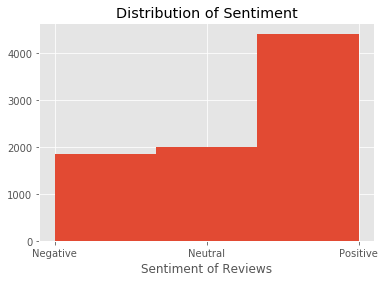

In [36]:
#change to numerical values
df11.to_csv('annotated_csv', sep='\t', encoding='utf-8') 
df11['polarity'] = df11.polarity.map(lambda x: int(2) if x =='positive' else int(0) if x =='negative' else int(1) if x == 'neutral' else np.nan)
print(df11['polarity'].value_counts())
print(df11)
plt.hist(df11.polarity, bins = 3, align= 'mid')
plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
plt.xlabel('Sentiment of Reviews')
plt.title('Distribution of Sentiment')
plt.show()

In [37]:
df12=df11.sample(n=9138, replace=True, random_state=1)
print(df12.shape)

(9138, 2)


In [38]:
x=df12['tokenized_sents']
y=df12['polarity']
seed =7
np.random.seed(seed)
maximumlen=420 #maximum tweet length(no of words)
# Truncate and pad the review sequences
#Convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df12['tokenized_sents'].values)
x = tokenizer.texts_to_sequences(df12['tokenized_sents'].values)
vocab_size = len(tokenizer.word_index) + 1 
print("vocab_size",vocab_size)
#print(wordtoint)
#padding sequences to maximum length tweet
#x = pad_sequences(wordtoint, maxlen=maximumlen)
#print(x.shape) 
X = pad_sequences(x,maxlen=maximumlen)
print(X.shape[0])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)#validation data
x_train=pad_sequences(x_train, maxlen=maximumlen)
x_test=pad_sequences(x_test, maxlen=maximumlen)
#padding x_val to maximum length
x_val=pad_sequences(x_val, maxlen=maximumlen)
print(x_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
model2 = gensim.models.Word2Vec(df11['tokenized_sents'],min_count = 1, size = 32,window = 5, sg = 1,iter=20,max_vocab_size=24200,seed=7) 
print(model2)
#model2.save('w2v.model')
#print(model2.similarity('ጥሩ','ምርጥ'))
#print(model2.similarity('💚','💋'))
#print(model2.wv.most_similar('💋'))
#print(model2.vector_size)
#pretrained_weights = model2.wv.syn0

vocab_size 11905
9138
[[   0    0    0 ... 8954 8955  386]
 [   0    0    0 ...   49  481 5350]
 [   0    0    0 ... 9469   60 9470]
 ...
 [   0    0    0 ... 2021    9   62]
 [   0    0    0 ... 6362 4538  871]
 [   0    0    0 ...    0    0   20]]
(6579, 420)
(914, 420)
(6579,)
(914,)
Word2Vec(vocab=12997, size=32, alpha=0.025)


None
Train on 6579 samples, validate on 1645 samples
Epoch 1/8
 - 80s - loss: 1.0426 - acc: 0.5197 - val_loss: 1.0133 - val_acc: 0.5307
Epoch 2/8
 - 78s - loss: 0.8794 - acc: 0.5928 - val_loss: 0.6117 - val_acc: 0.7611
Epoch 3/8
 - 88s - loss: 0.5572 - acc: 0.7445 - val_loss: 0.4421 - val_acc: 0.8158
Epoch 4/8
 - 84s - loss: 0.4411 - acc: 0.8044 - val_loss: 0.4019 - val_acc: 0.8365
Epoch 5/8
 - 85s - loss: 0.3789 - acc: 0.8328 - val_loss: 0.3636 - val_acc: 0.8657
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 420, 8)            120000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 420, 8)            544       
_________________________________________________________________
dropout_11 (Dropout)         (None, 420, 8)            0         
_________________________________________________________________
flat

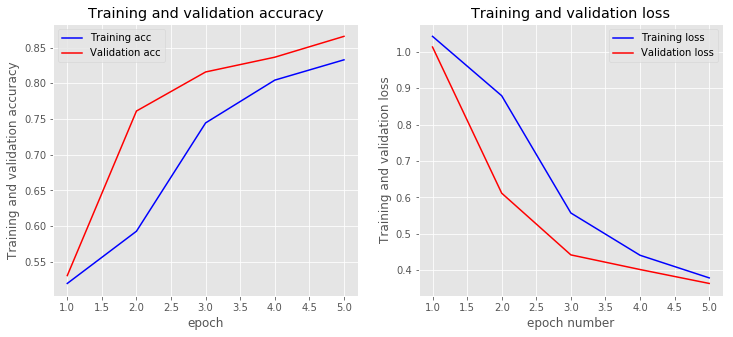

In [52]:
topwords=15000 #top words to consider
epoch=8         
batch=14
seed=7
embedding_size = 8
model=Sequential()
np.random.seed(0)
model.add(Embedding(topwords,8,input_length=maximumlen,dropout=0.5))
def lstm():
    model.add(LSTM(8,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1])))
    model.add(Dropout(0.7))
    #model.add(LSTM(4,activation='softmax',return_sequences=True))
    model.add(Flatten())
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
def bilstm():
    model.add(Bidirectional(LSTM(8,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1]),
                                 dropout=0.7,recurrent_dropout=0.5)))
    #model.add(Dropout(0.7))
    model.add(Bidirectional(LSTM(8,return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(16,activation= 'sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
def cnn():
    lstm_out = 8
    model.add(Conv1D(filters=64, kernel_size=5, activation='sigmoid', padding='causal'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.7))
    model.add(LSTM(units=lstm_out))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
def default():
    return "Incorrect model"
switcher = {
    1: lstm,
    2: bilstm,
    3: cnn
    }
def switch(choice):
    return switcher.get(choice, default)()
print(switch(1))
history=model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=epoch,batch_size=batch,verbose=2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, baseline=0.3)])
print(model.summary()) 
loss, accuracy = model.evaluate(x_test, y_test,verbose = 2, batch_size=batch) 
print("Training Accuracy: {:.4f}".format(accuracy))
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch number')
    plt.ylabel('Training and validation loss')
    plt.legend()
plot_history(history)

In [58]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
yhat_probs = np.array([np.argmax(pred) for pred in yhat_probs])
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes,normalize=True)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,labels=[0,1,2],average='macro') #average='micro' gives total score of Tp/tp+fp none gives each class precision
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,labels=[0,1,2],average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,labels=[0,1,2],average='macro')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_test,yhat_classes,labels=[0,1,2])
print(matrix)

Accuracy: 0.862144
Precision: 0.823090
Recall: 0.821350
F1 score: 0.820519
[[162  35   2]
 [ 52 158  22]
 [  5  10 468]]


In [41]:
'''
f= open("ture.csv","w+")
fulll=[]
for i in range(len(df11.index)):
    x=df11.iat[i,0]
    full = ' '.join(x)
    f.write(full)
    f.write('\n')
f.close()
f=open("ture.csv","r")
df=pd.read_csv('ture.csv',delimiter=';',names=['text'],encoding="utf-8")
all=pd.DataFrame(df)
vectorizer=CountVectorizer()
# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2),max_features=24200)
X=bigram_vectorizer.fit_transform(df['text']).toarray()
print(X.shape)
y=df11['polarity'].astype('int')
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)
model =MultinomialNB()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy:",metrics.accuracy_score(expected, predicted))
n=X_test.shape[0]
error=np.sum(y_test!=predicted)
error=error*100
error=error/float(n)
print(error)
'''

'\nf= open("ture.csv","w+")\nfulll=[]\nfor i in range(len(df11.index)):\n    x=df11.iat[i,0]\n    full = \' \'.join(x)\n    f.write(full)\n    f.write(\'\n\')\nf.close()\nf=open("ture.csv","r")\ndf=pd.read_csv(\'ture.csv\',delimiter=\';\',names=[\'text\'],encoding="utf-8")\nall=pd.DataFrame(df)\nvectorizer=CountVectorizer()\n# #Finding the bigram representation \nbigram_vectorizer=CountVectorizer(ngram_range=(1,2),max_features=24200)\nX=bigram_vectorizer.fit_transform(df[\'text\']).toarray()\nprint(X.shape)\ny=df11[\'polarity\'].astype(\'int\')\nprint(y.shape)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)\nmodel =MultinomialNB()\nmodel.fit(X_train, y_train)\nexpected = y_test\npredicted = model.predict(X_test)\nprint(metrics.classification_report(expected, predicted))\nprint(metrics.confusion_matrix(expected, predicted))\nprint("Accuracy:",metrics.accuracy_score(expected, predicted))\nn=X_test.shape[0]\nerror=np.sum(y_test!=predicted)\ner

[[161  36   2]
 [ 57 157  18]
 [  5  10 468]]


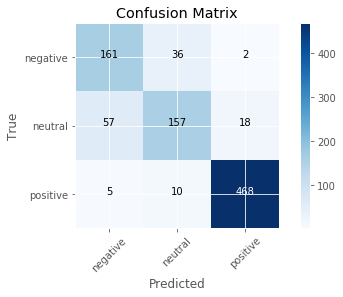

In [42]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
# plot the confusion Matrix
cm = confusion_matrix(y_test,yhat_classes)
plot_confusion_matrix(cm, {'negative': 0, 'neutral':1,'positive':2})